# Exploratory data Analysis

EDA
1. Setup
Import libraries

Load data

2. General Feature Distribution
Countplots for all non-age/date columns



3. Death Analysis
Death distribution (countplot + pie chart)

Death vs. Age (boxplot)

Death vs. Medical Unit (countplot, boxplot)

Death vs. Infection Status (countplots)

Death vs. Gender (pie chart)

Death vs. Obesity (countplot)

Death vs. Diseases (percentage bar plot)



4. Covid Carrier Analysis
Carrier percentage (overall and among dead)

Age vs. Covid Carrier (lineplot)

Obesity vs. Covid Carrier (countplot)

Pregnancy vs. Covid Carrier (pregnant vs non-pregnant separately)

Diseases vs. Covid Carrier



5. Hospitalization Analysis
Hospitalized vs non-hospitalized distribution (pie chart)

Death among hospitalized

Hospitalization among dead

Conclusion

6. Time Series Analysis
Deaths over time (histplot of death dates)

Deaths across months and years (countplots)



7. Important Feature Effect Summary
Percentage death due to each factor (bar plot)


In [1]:
#1. Setup and import needed libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter # To adjust the ticks formatting
import warnings
warnings.filterwarnings('ignore') # To ignore warning messages


In [2]:
#Load Data:
Clean_Covid=pd.read_csv("C:/Users/Dell/Desktop/Aya Allam DEPI Project/Covid_cleaned_data.csv")

In [3]:
Clean_Covid.shape

(220793, 20)

In [4]:
Clean_Covid.columns

Index(['Medical_Unit_Level', 'Medical_unit', 'Sex', 'Patient_type',
       'Pneumonia', 'Age', 'Pregnant', 'Diabetes',
       'Chronic_Obstructive_Pulmonary_Disease', 'Asthma', 'Immun_Suppressed',
       'Hipertension', 'Other_disease', 'Cardiovascular', 'Obesity',
       'Renal_chronic', 'Tobacco', 'covid_infected', 'Severity_score',
       'Has_died'],
      dtype='object')

1) Correlation Matrix:

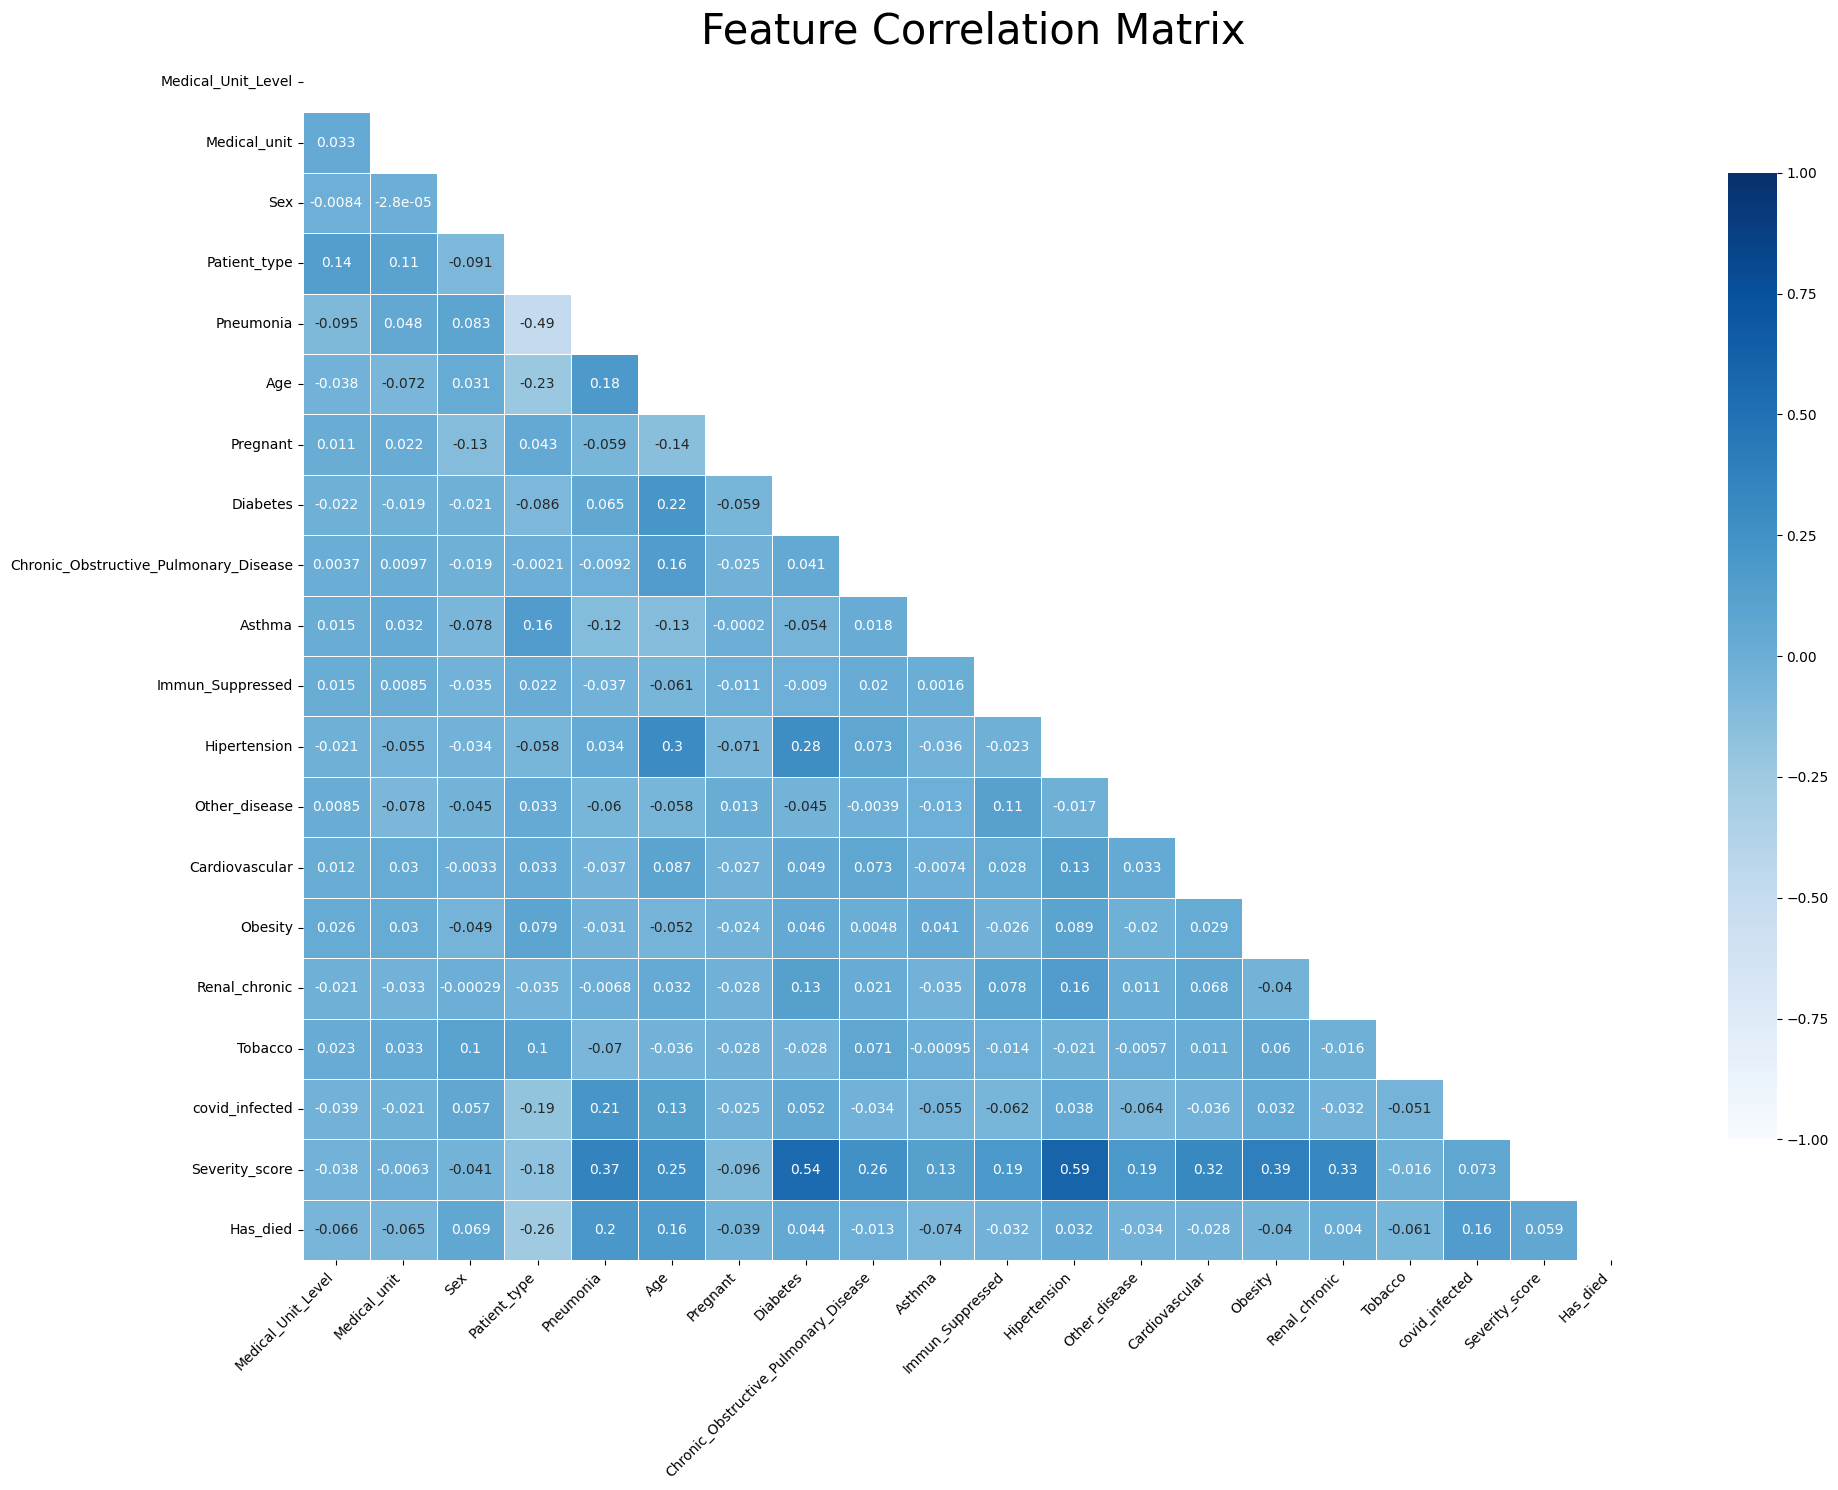

In [5]:
# 📈 Correlation Heatmap
corr_matrix = Clean_Covid.corr()
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Draw the heatmap
sns.heatmap(corr_matrix, 
            mask=mask, 
            annot=True, 
            cmap="Blues", 
            vmin=-1, vmax=1, 
            linewidths=.5, 
            cbar_kws={"shrink": .8})

# Titles and layout
plt.title('Feature Correlation Matrix', fontsize=30, color='black')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<Axes: >

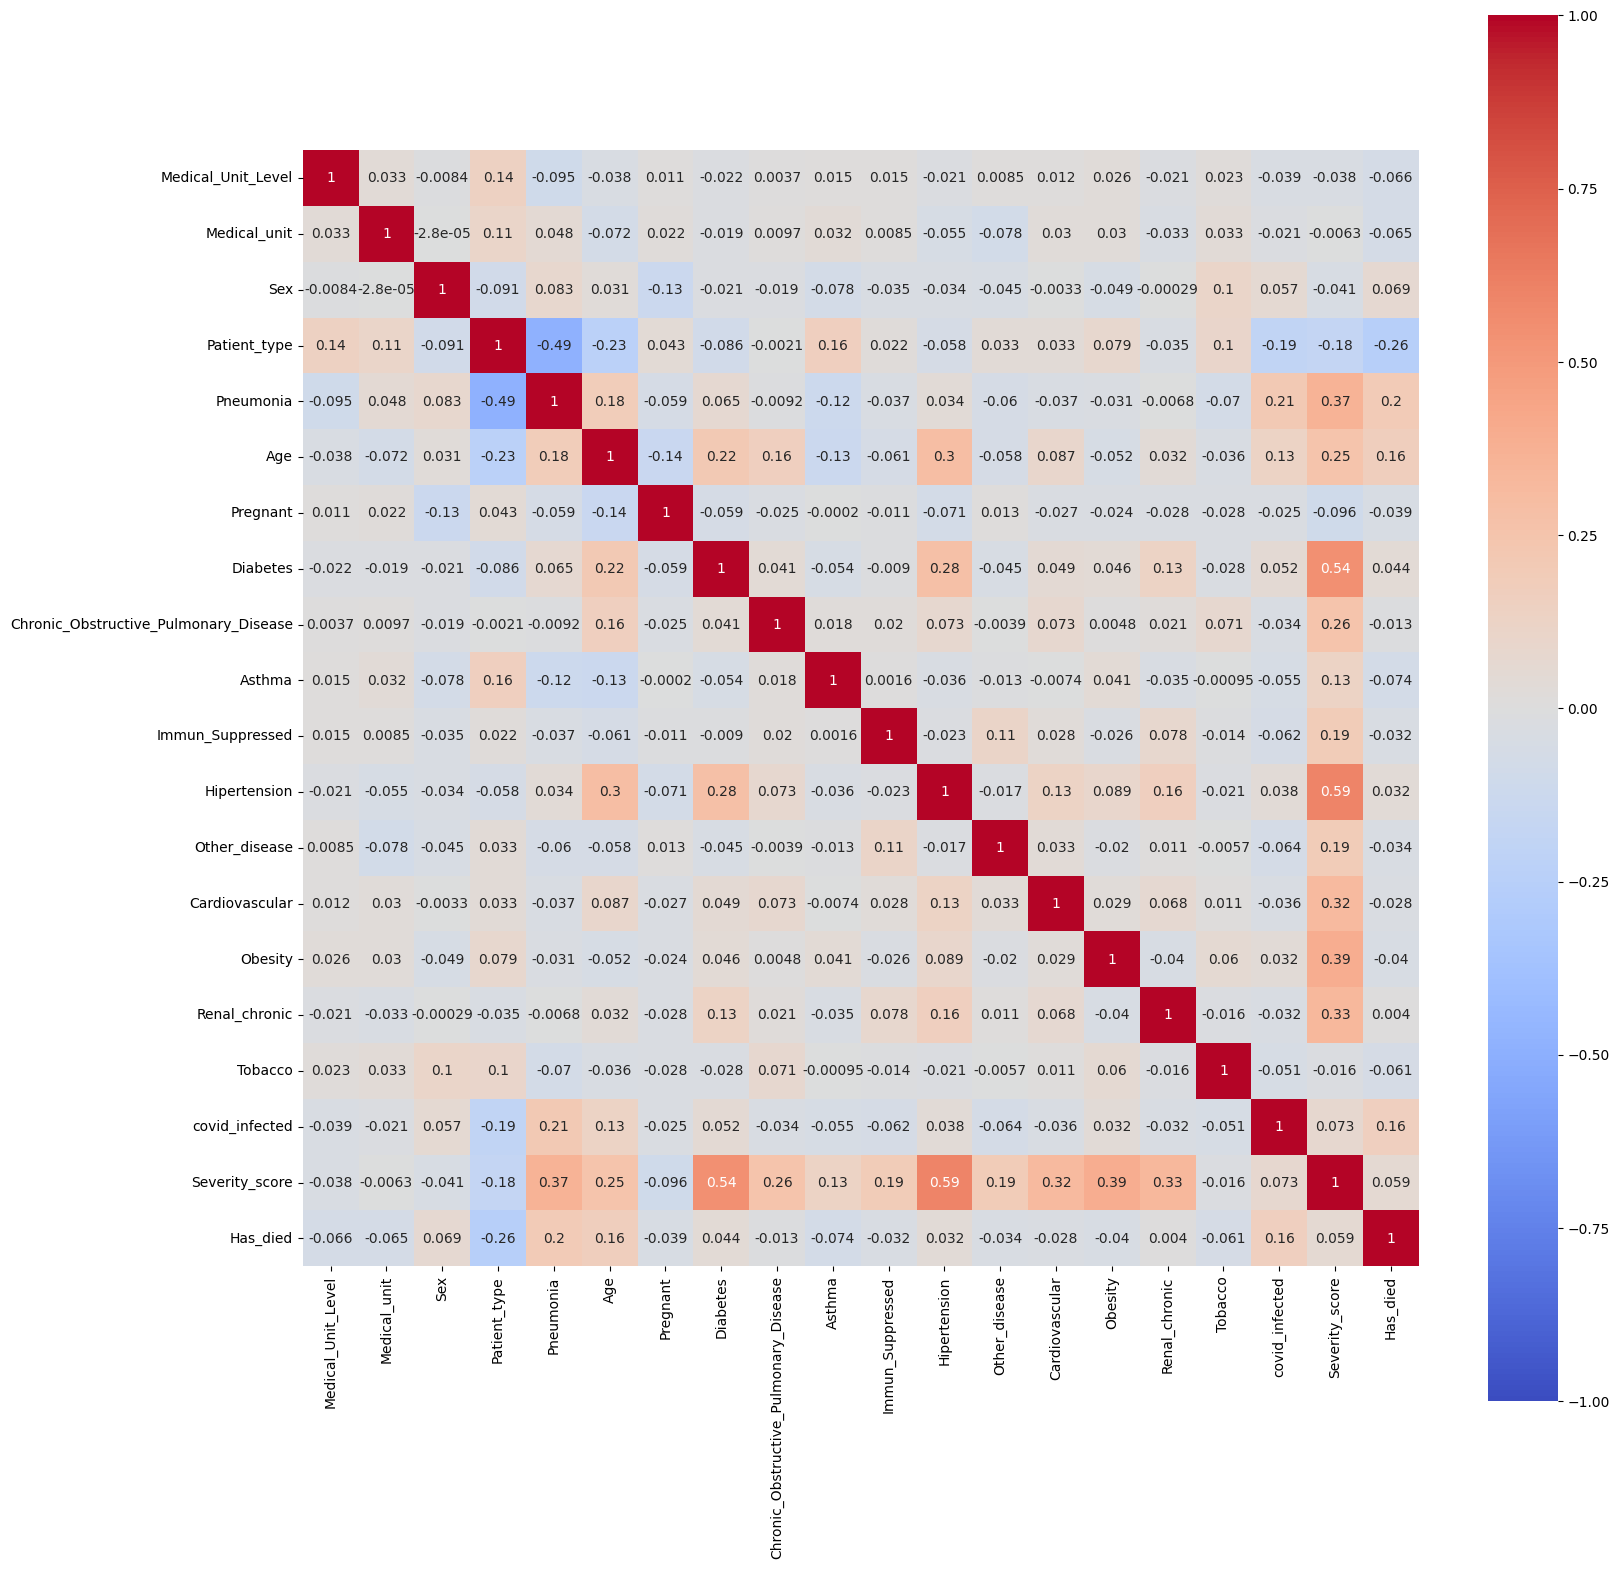

In [6]:
#Correlation matrix without removal of the upper triangle
plt.figure(figsize=(18,18))
sns.heatmap(Clean_Covid.corr("pearson"),vmin=-1, vmax=1,cmap='coolwarm',annot=True, square=True)

2) General feature distribution:


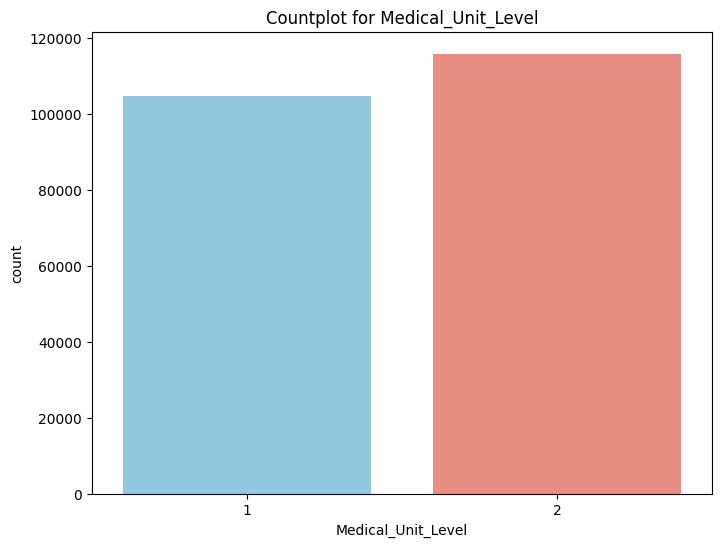

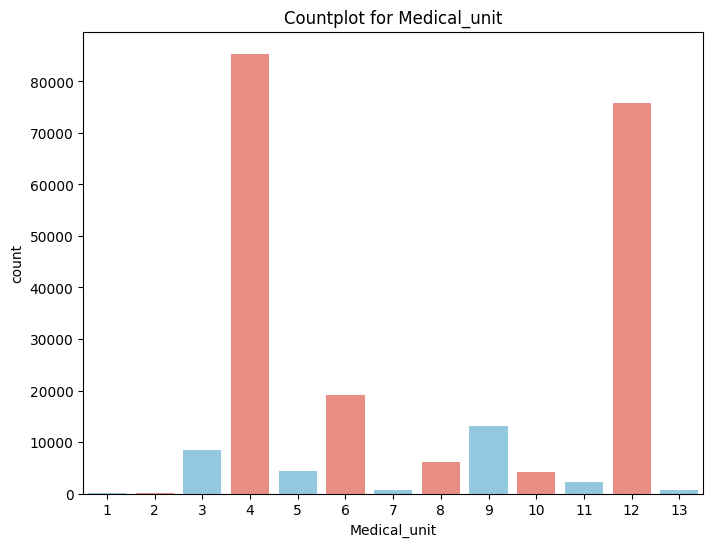

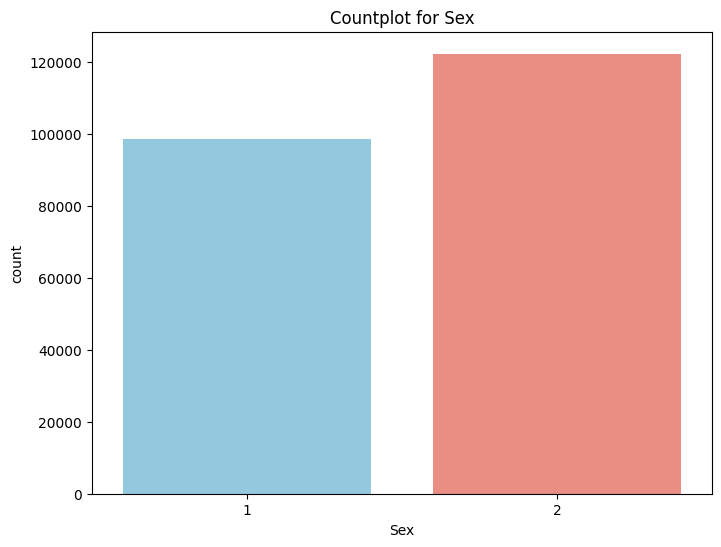

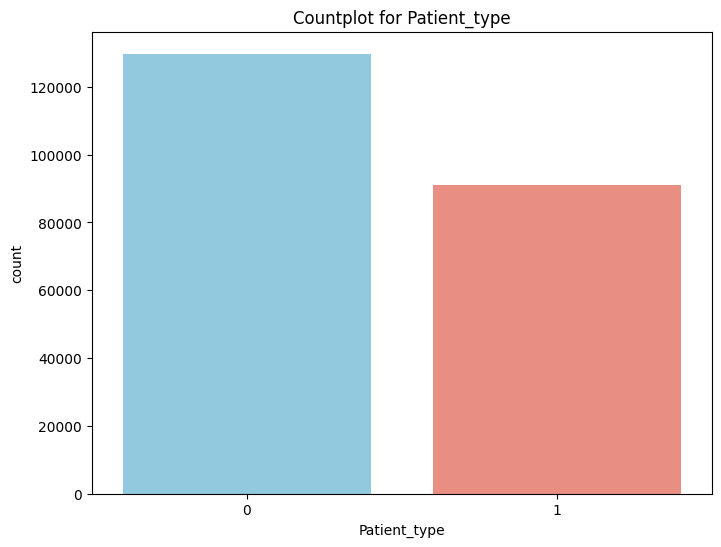

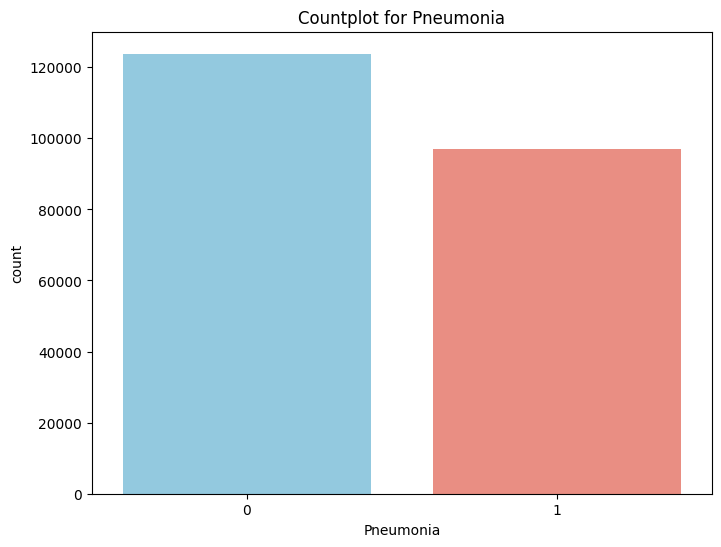

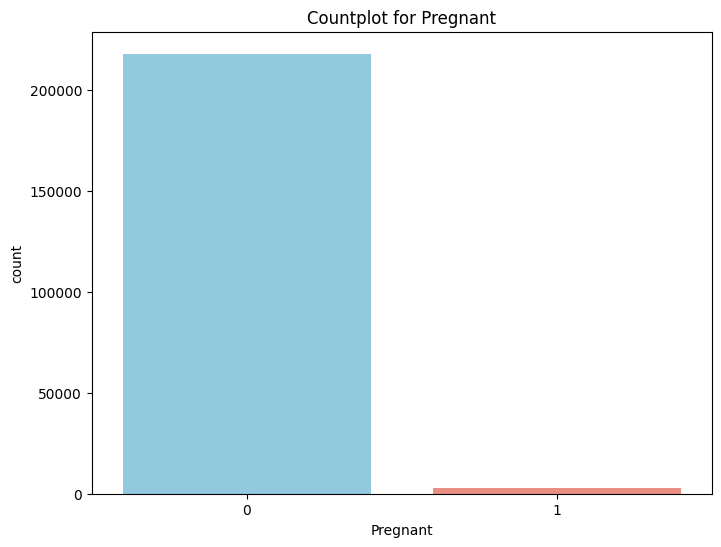

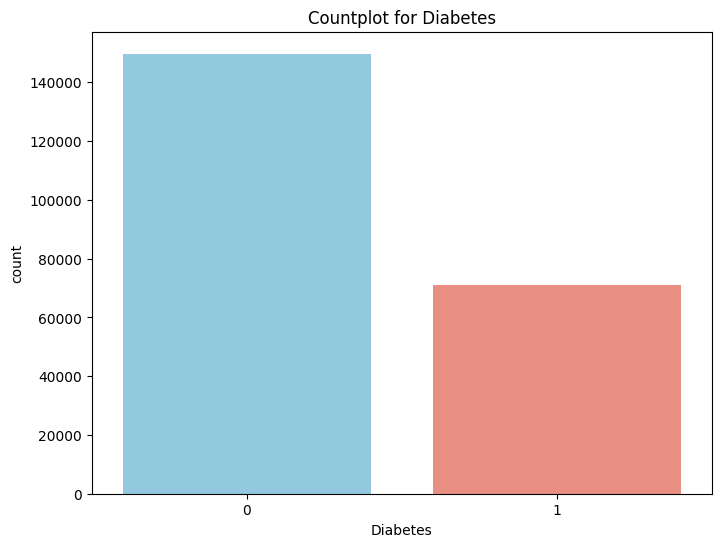

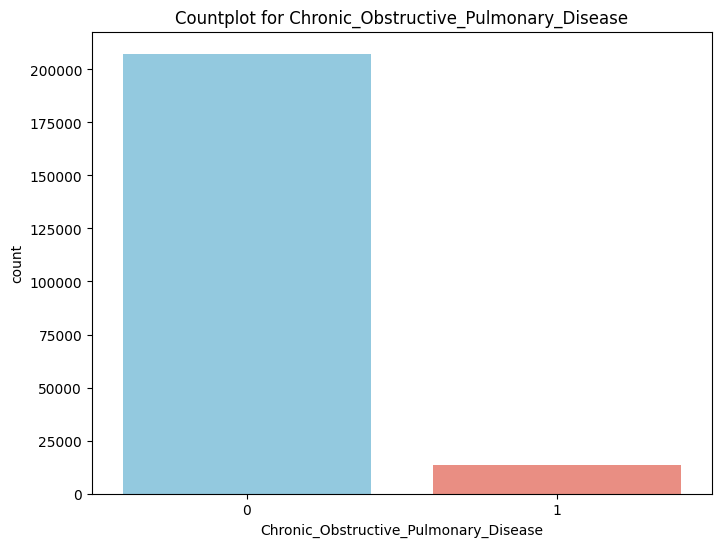

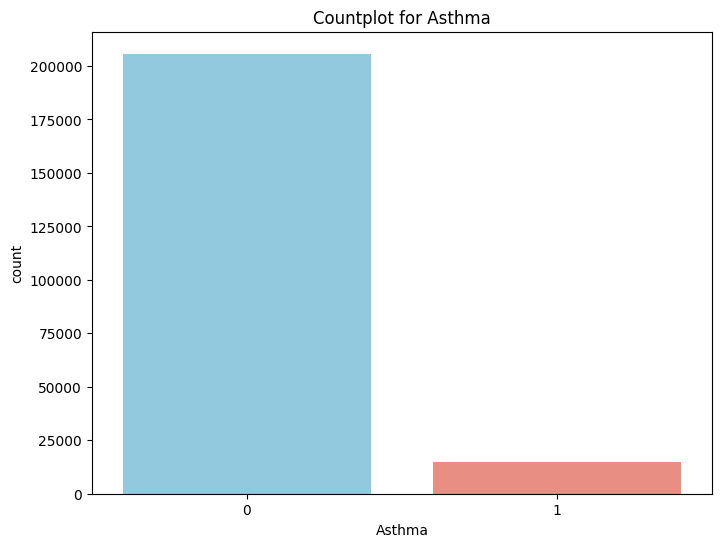

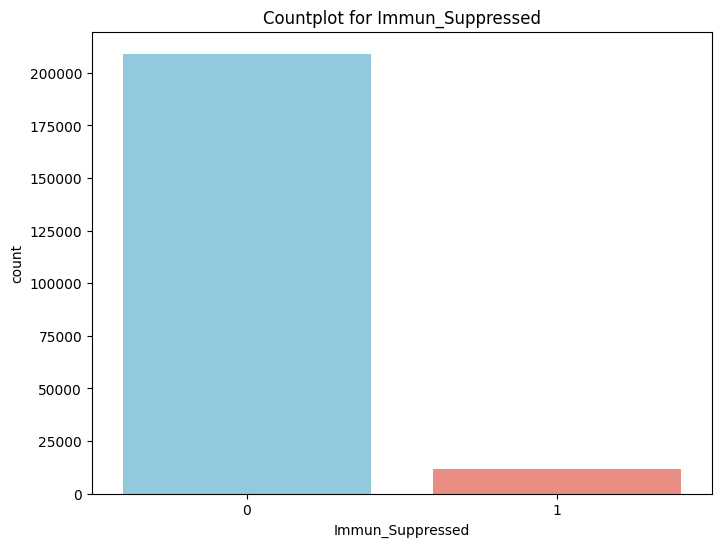

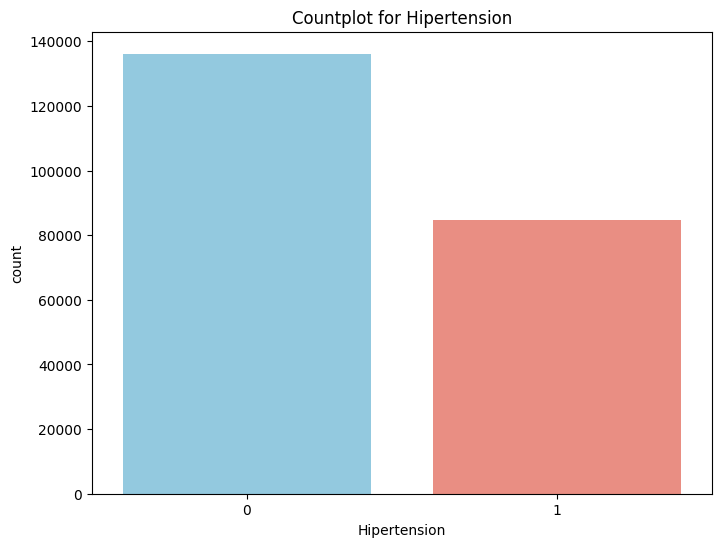

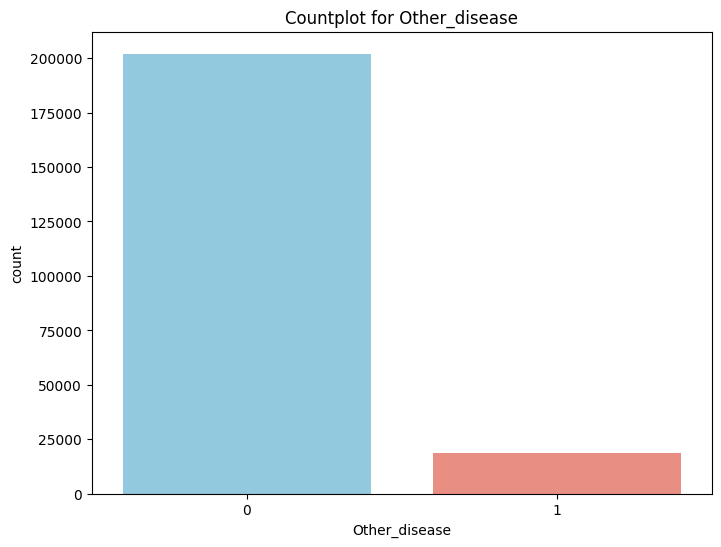

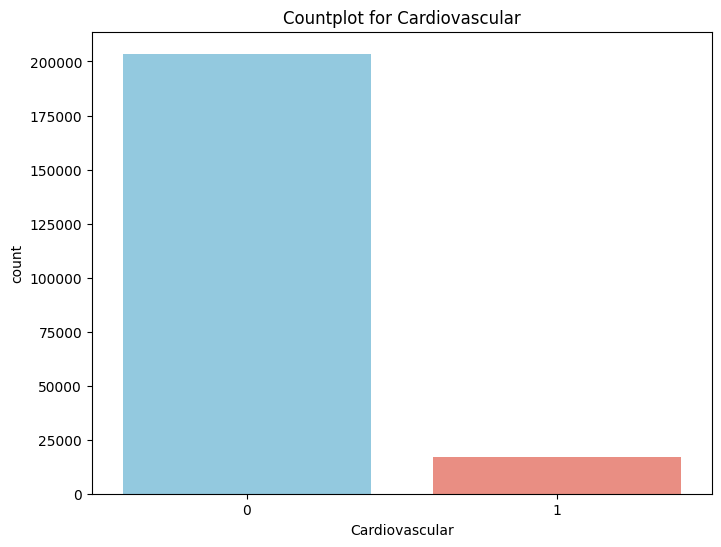

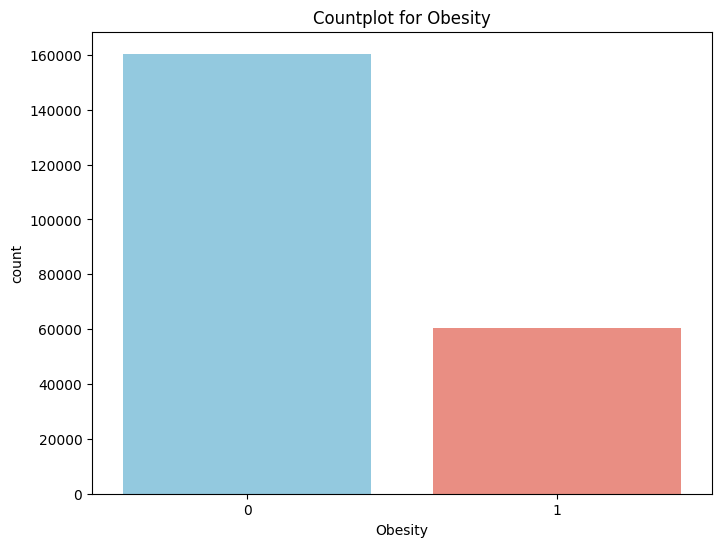

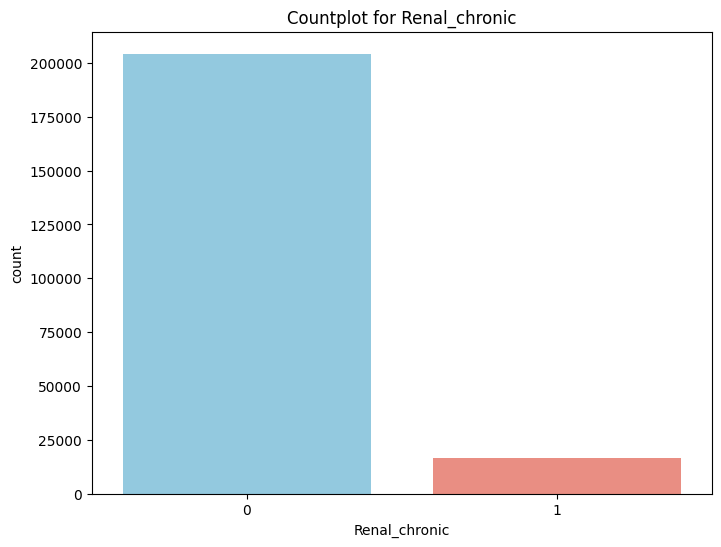

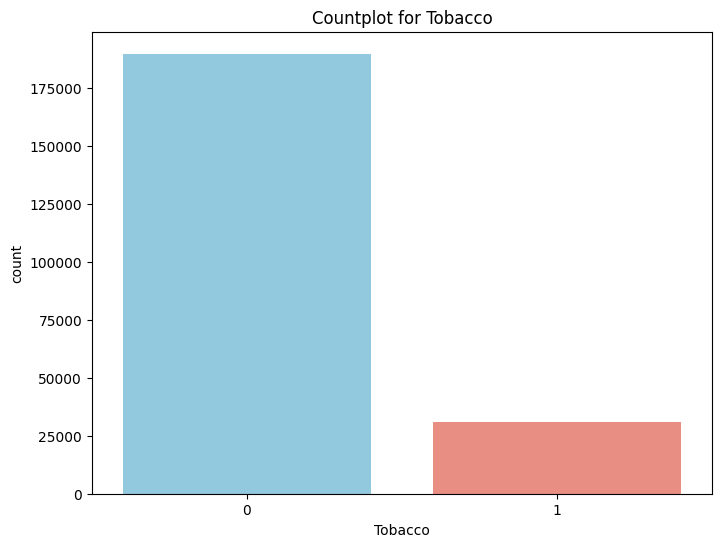

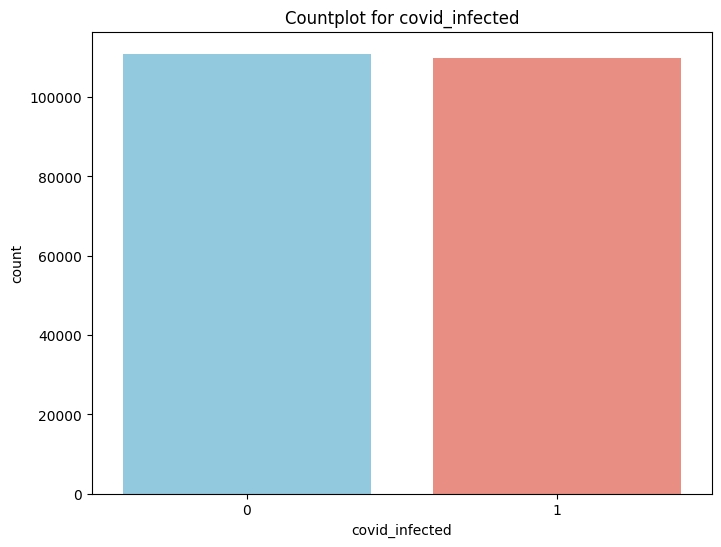

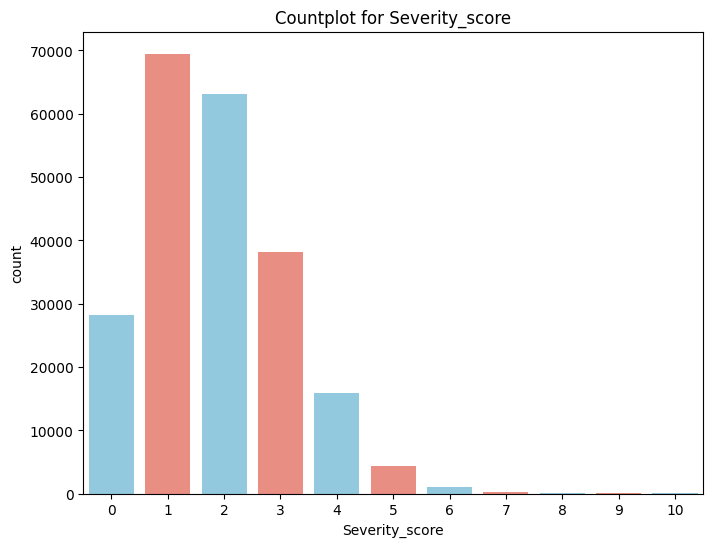

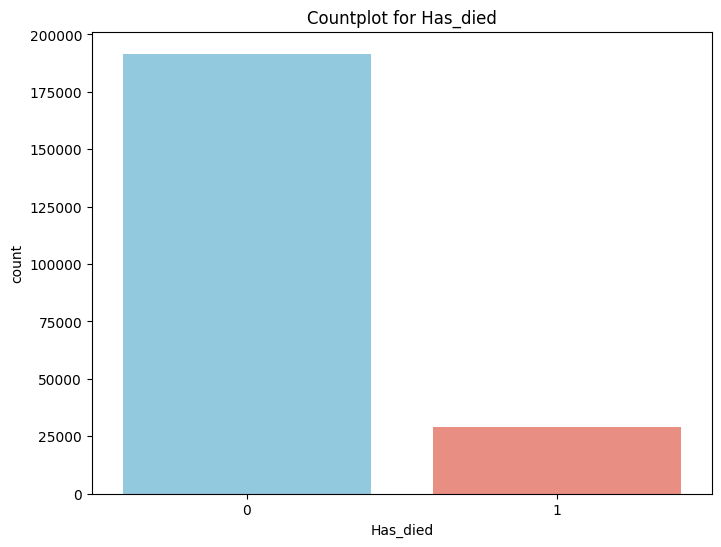

In [7]:
# Iterate over the columns in df
# Define a custom color palette
custom_palette = ['skyblue', 'salmon']  # You can adjust this to your preferred colors

# Iterate over the columns in df
for col in Clean_Covid.columns:
    if col not in 'Age':
        plt.figure(figsize=(8, 6))
        
        # Plot with custom color and ensure data is interpreted as integer for correct display
        sns.countplot(x=Clean_Covid[col].astype(int), palette=custom_palette)
         
        plt.title(f"Countplot for {col}")
        plt.show()

In [8]:
Clean_Covid.columns

Index(['Medical_Unit_Level', 'Medical_unit', 'Sex', 'Patient_type',
       'Pneumonia', 'Age', 'Pregnant', 'Diabetes',
       'Chronic_Obstructive_Pulmonary_Disease', 'Asthma', 'Immun_Suppressed',
       'Hipertension', 'Other_disease', 'Cardiovascular', 'Obesity',
       'Renal_chronic', 'Tobacco', 'covid_infected', 'Severity_score',
       'Has_died'],
      dtype='object')

In [9]:
# For more readability , i made copy of my data and i convert from 0,1 or 1,2 to related map:
mapping_dict = {
    'Sex': {1: 'Female', 2: 'Male'},
    'covid_infected': {1: 'Covid Carrier', 0: 'Non Carrier'},
    'Patient_type': {1: 'Returned Home', 0: 'Hospitalized'},
   'Pneumonia': {0: 'No Pneumonia', 1: 'Pneumonia'},
    'Pregnant': {0: 'Not Pregnant', 1: 'Pregnant'},
    'Diabetes': {0: 'No Diabetes', 1: 'Diabetic'},
    'Chronic_Obstructive_Pulmonary_Disease': {0: 'No COPD', 1: 'COPD'},
    'Asthma': {0: 'No Asthma', 1: 'Asthmatic'},
    'Immun_Suppressed': {0: 'No Immune Suppression', 1: 'Immunosuppressed'},
    'Hipertension': {0: 'No Hypertension', 1: 'Hypertensive'},
    'Cardiovascular': {0: 'No Cardiovascular Disease', 1: 'Cardiovascular Disease'},
    'Renal_chronic': {0: 'No Chronic Renal Disease', 1: 'Chronic Renal Disease'},
    'Other_disease': {0: 'No Other Disease', 1: 'Other Disease'},
    'Obesity': {0: 'Not Obese', 1: 'Obese'},
    'Tobacco': {0: 'Non Smoker', 1: 'Smoker'},
    
}
new_covid = Clean_Covid.copy()  # Create a copy of the original DataFrame

# 🔁 Apply all mappings in one loop
for col, mapping in mapping_dict.items():
    if col in new_covid.columns:
        new_covid[col] = new_covid[col].map(mapping)

In [10]:
new_covid.shape

(220793, 20)

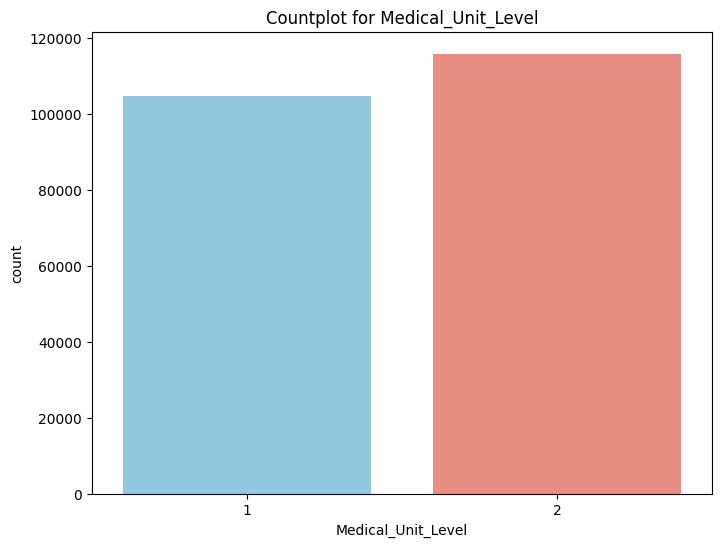

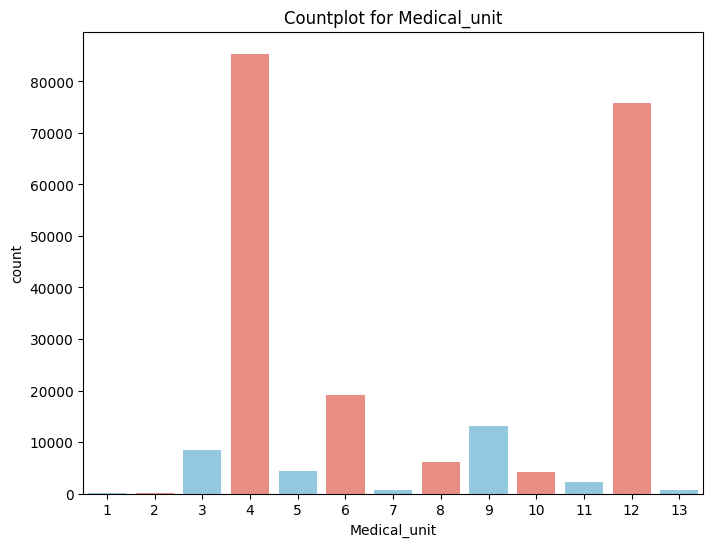

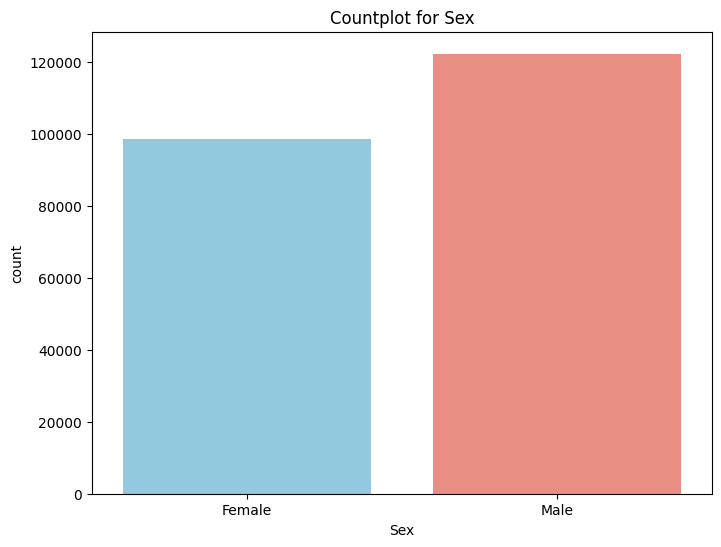

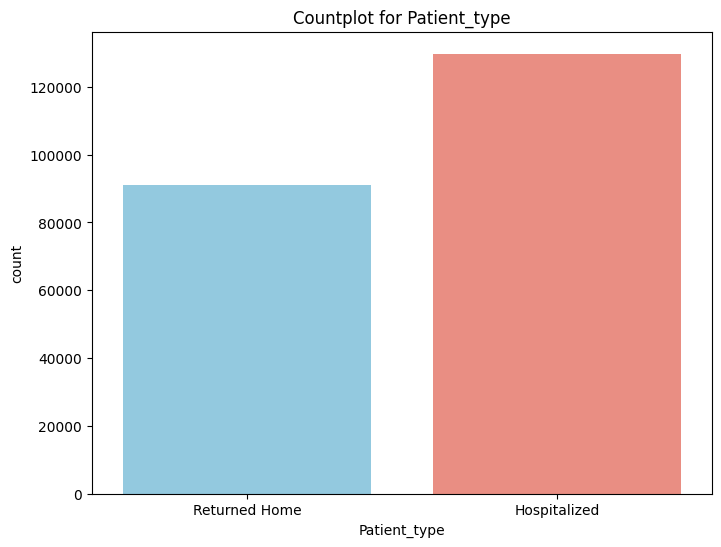

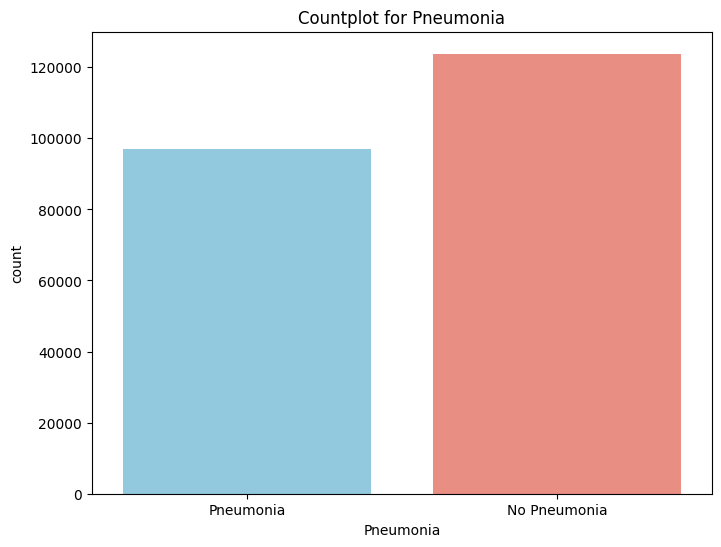

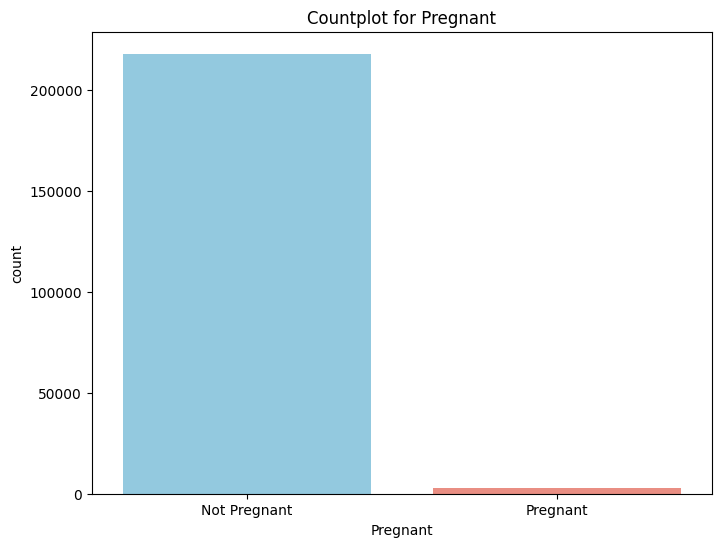

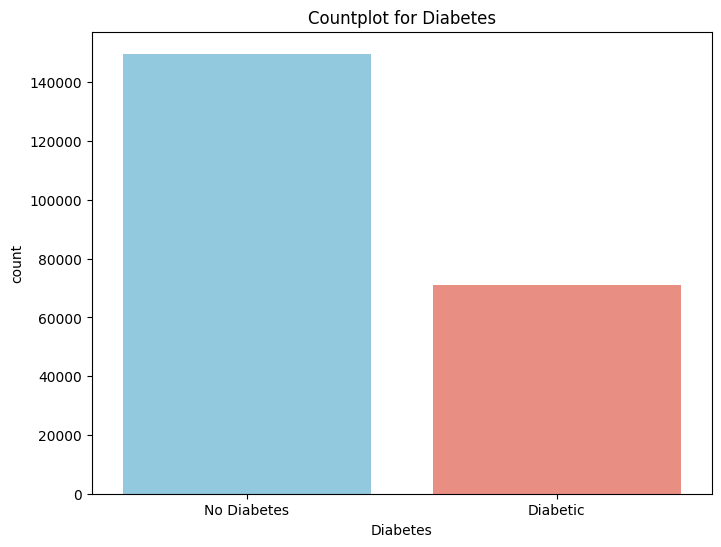

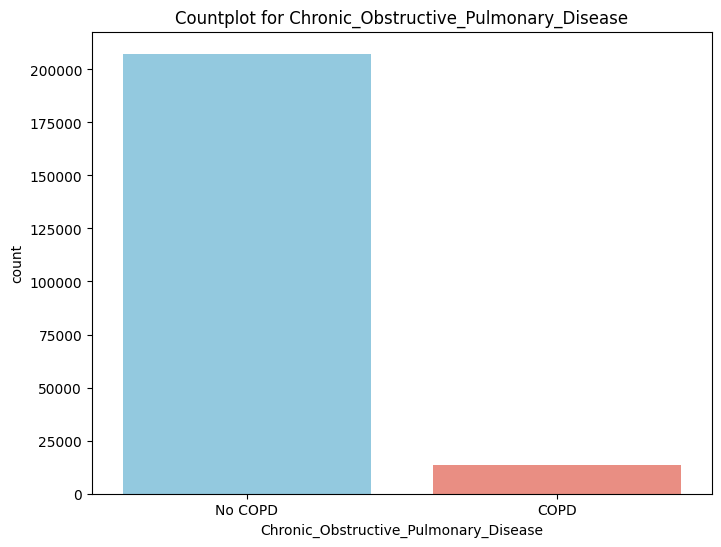

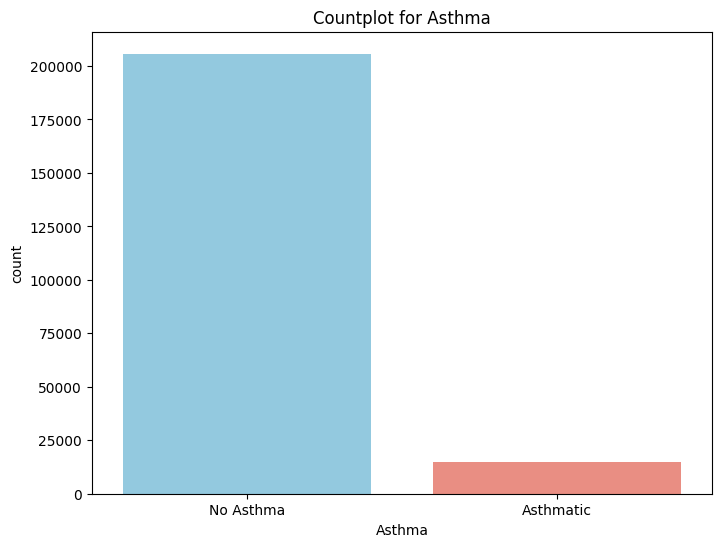

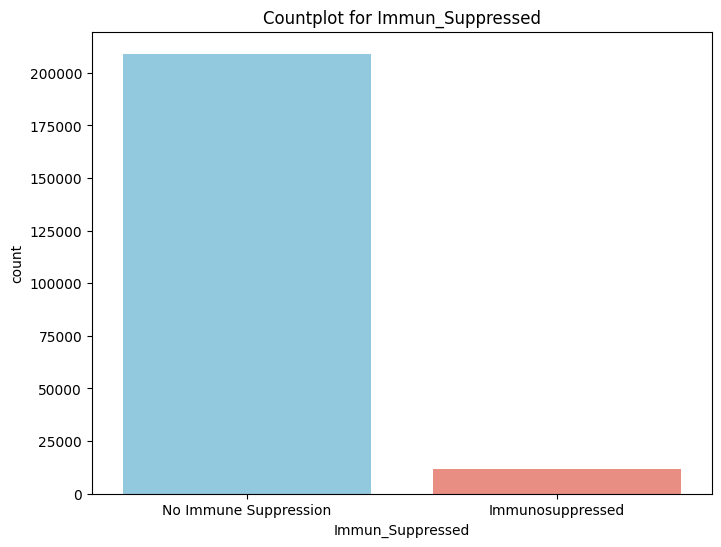

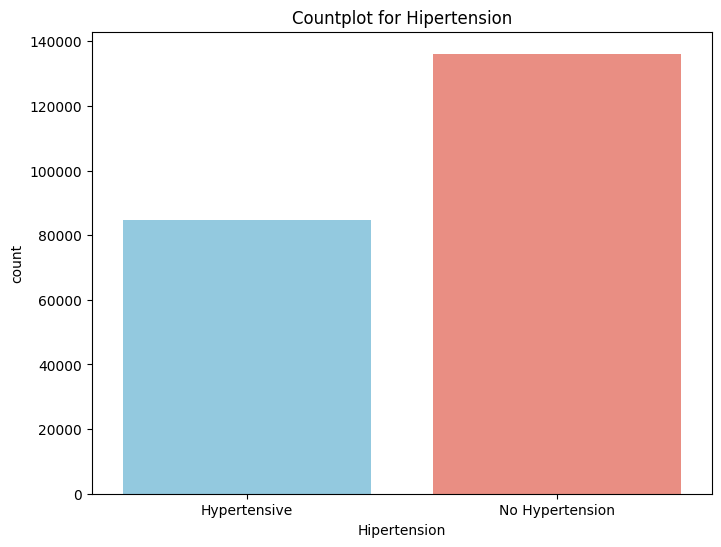

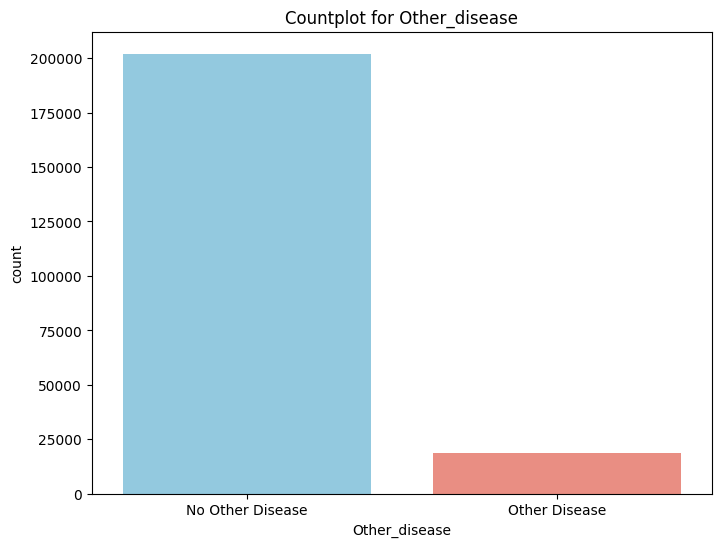

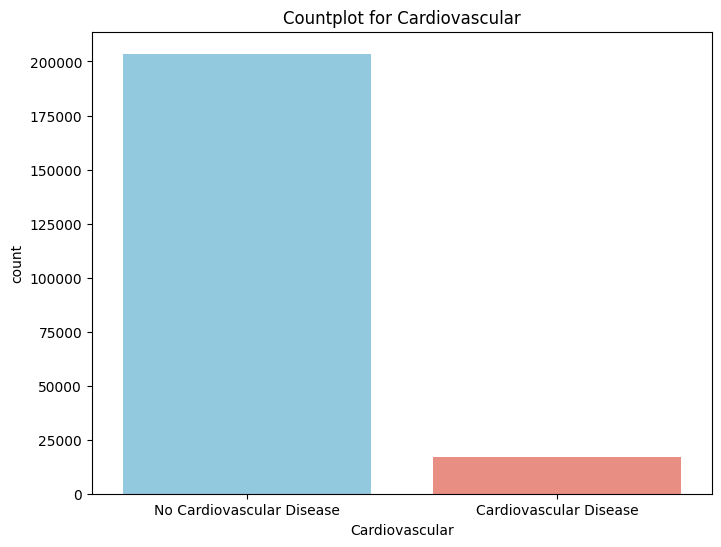

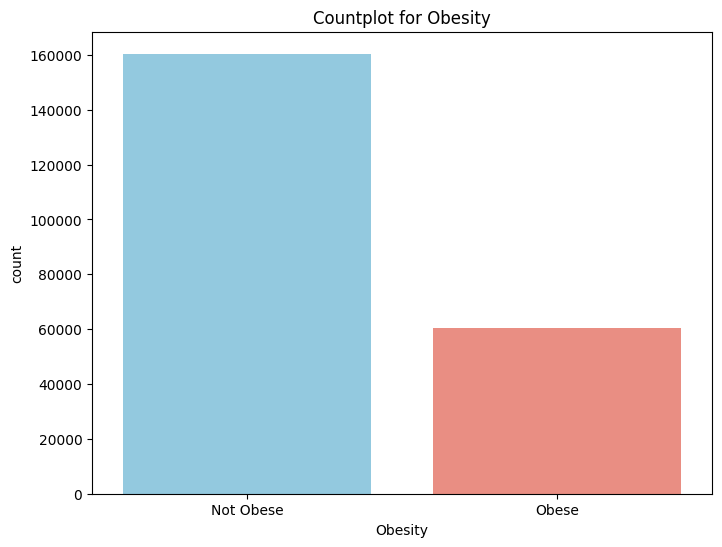

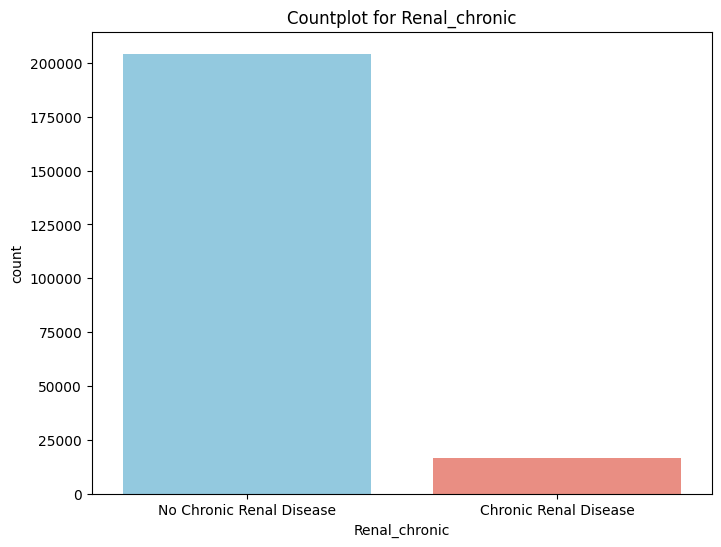

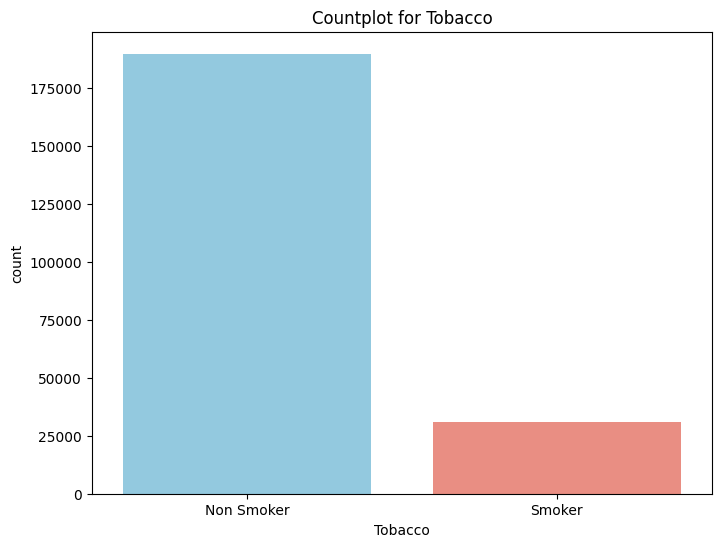

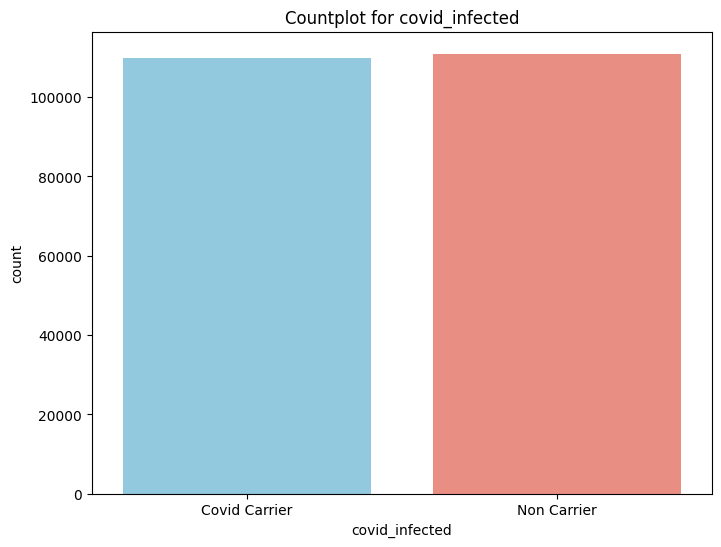

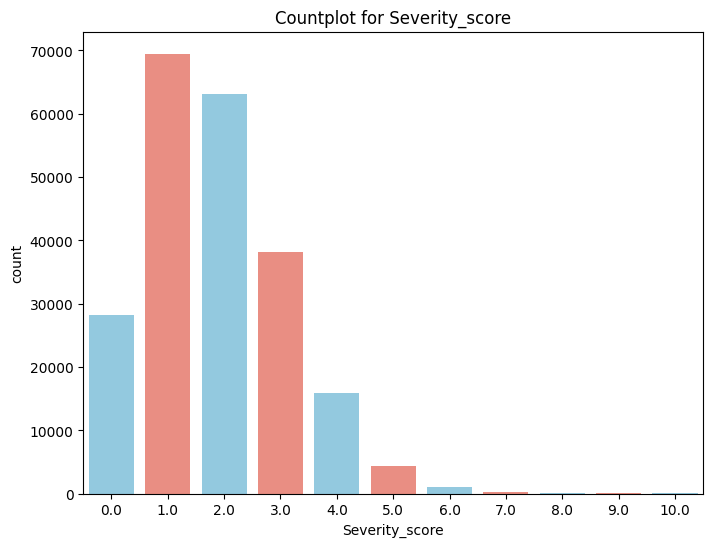

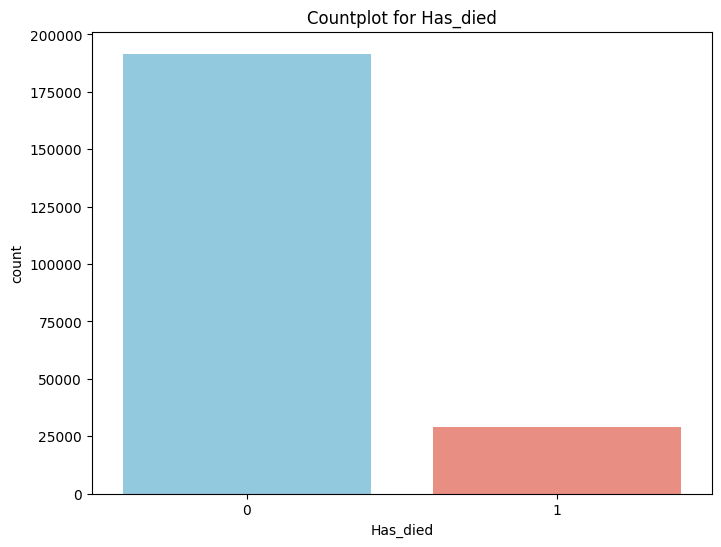

In [11]:
# Iterate over the columns in df
# Define a custom color palette
custom_palette = ['skyblue', 'salmon']  # You can adjust this to your preferred colors

# Iterate over the columns in df
for col in new_covid.columns:
    if col not in 'Age':
        plt.figure(figsize=(8, 6))
        
        # Plot with custom color and ensure data is interpreted as integer for correct display
        sns.countplot(x=new_covid[col], palette=custom_palette)
         
        plt.title(f"Countplot for {col}")
        plt.show()

# Death Distribution:


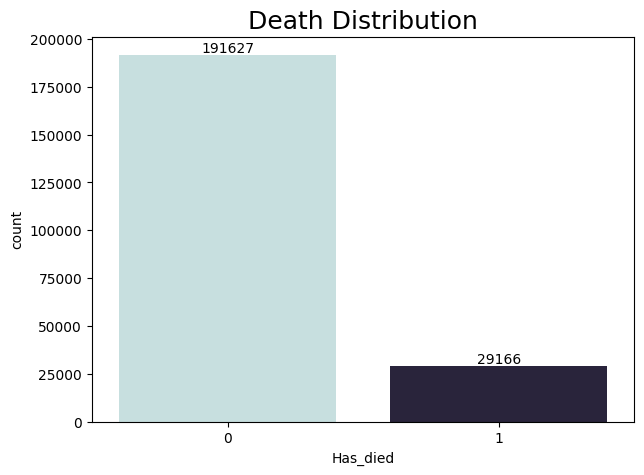

In [12]:
# Assuming 'covid' is your DataFrame and 'had_died' is the relevant column
plt.figure(figsize=(7, 5))
plt.title('Death Distribution', fontsize=18)

# Create countplot for the 'had_died' column (or adjust to your column name)
ax = sns.countplot(x=Clean_Covid['Has_died'], palette="ch:start=.2,rot=-.3")

# Add bar labels to show counts on top of bars
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])
# Show the plot
plt.show()

In [13]:
Clean_Covid['Has_died'].value_counts()

Has_died
0    191627
1     29166
Name: count, dtype: int64

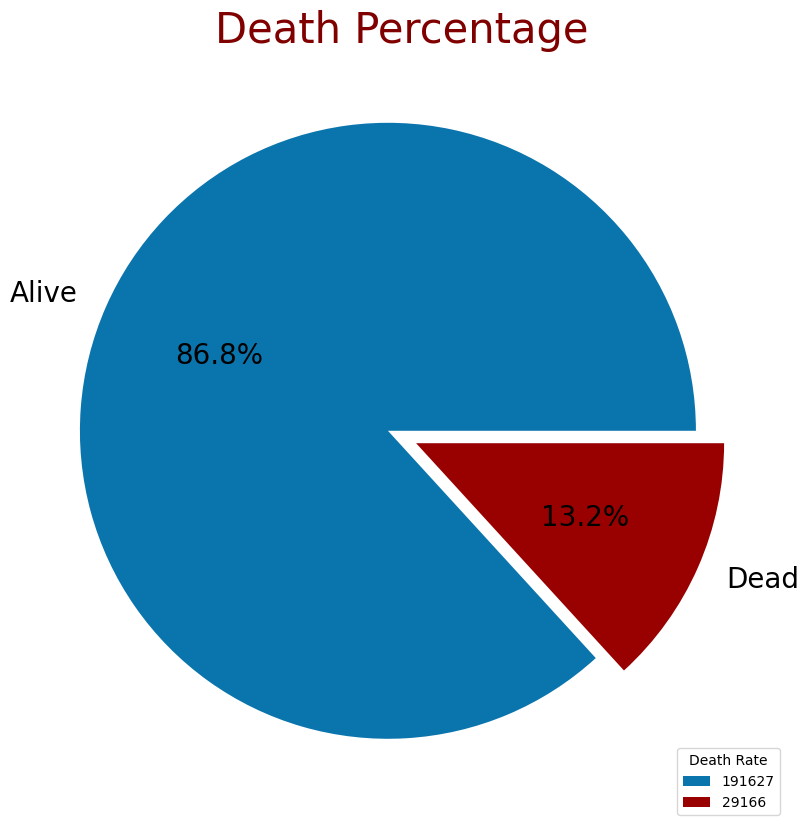

In [14]:
labels = ["Alive", "Dead"]
sizes = Clean_Covid['Has_died'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.05, 0.05])
plt.title('Death Percentage',color = '#800000',fontsize = 30)
plt.legend(Clean_Covid['Has_died'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()


# Carriers and death relation:

In [15]:
# Extract dead people only and 
df_dead = Clean_Covid[Clean_Covid["Has_died"] == 1]
df_dead

,Medical_Unit_Level,Medical_unit,Sex,Patient_type,Pneumonia,Age,Pregnant,Diabetes,Chronic_Obstructive_Pulmonary_Disease,Asthma,Immun_Suppressed,Hipertension,Other_disease,Cardiovascular,Obesity,Renal_chronic,Tobacco,covid_infected,Severity_score,Has_died
0,2,1,1,1,1.0,65.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,2.0,1
1,2,1,2,1,1.0,72.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0,4.0,1
2,2,1,2,0,0.0,55.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,1
3,2,1,1,1,0.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1
123,1,2,2,0,1.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220153,1,13,1,0,1.0,85.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1,4.0,1
220154,1,13,2,1,1.0,70.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,2.0,1
220155,1,13,2,0,1.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,1
220156,1,13,1,1,1.0,63.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,2.0,1


In [16]:
df_dead.columns

Index(['Medical_Unit_Level', 'Medical_unit', 'Sex', 'Patient_type',
       'Pneumonia', 'Age', 'Pregnant', 'Diabetes',
       'Chronic_Obstructive_Pulmonary_Disease', 'Asthma', 'Immun_Suppressed',
       'Hipertension', 'Other_disease', 'Cardiovascular', 'Obesity',
       'Renal_chronic', 'Tobacco', 'covid_infected', 'Severity_score',
       'Has_died'],
      dtype='object')

In [17]:
# Create the 'Covid_or_Not' column based on 'CLASIFFICATION_FINAL'
df_dead['Covid_or_Not'] = ['Covid Carrier' if x == 1 else 'Non Carrier' for x in df_dead['covid_infected']]


# Check the result
print(df_dead[['Has_died', 'Covid_or_Not']].head())


     Has_died   Covid_or_Not
0           1  Covid Carrier
1           1    Non Carrier
2           1  Covid Carrier
3           1    Non Carrier
123         1    Non Carrier


In [18]:
 df_dead['Covid_or_Not'].value_counts()

Covid_or_Not
Covid Carrier    20548
Non Carrier       8618
Name: count, dtype: int64

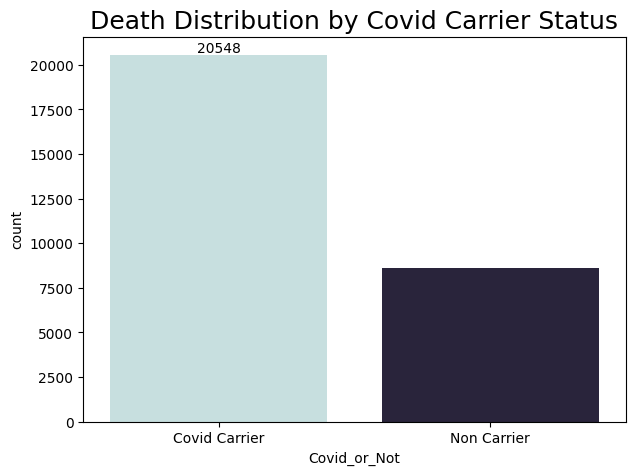

In [19]:
plt.figure(figsize=(7, 5))
plt.title('Death Distribution by Covid Carrier Status', fontsize=18)

# Create countplot for the 'Covid_or_Not' column
ax = sns.countplot(x=df_dead['Covid_or_Not'], palette="ch:start=.2,rot=-.3")

# Add bar labels to show counts on top of bars
plt.bar_label(ax.containers[0])

# Show the plot
plt.show()

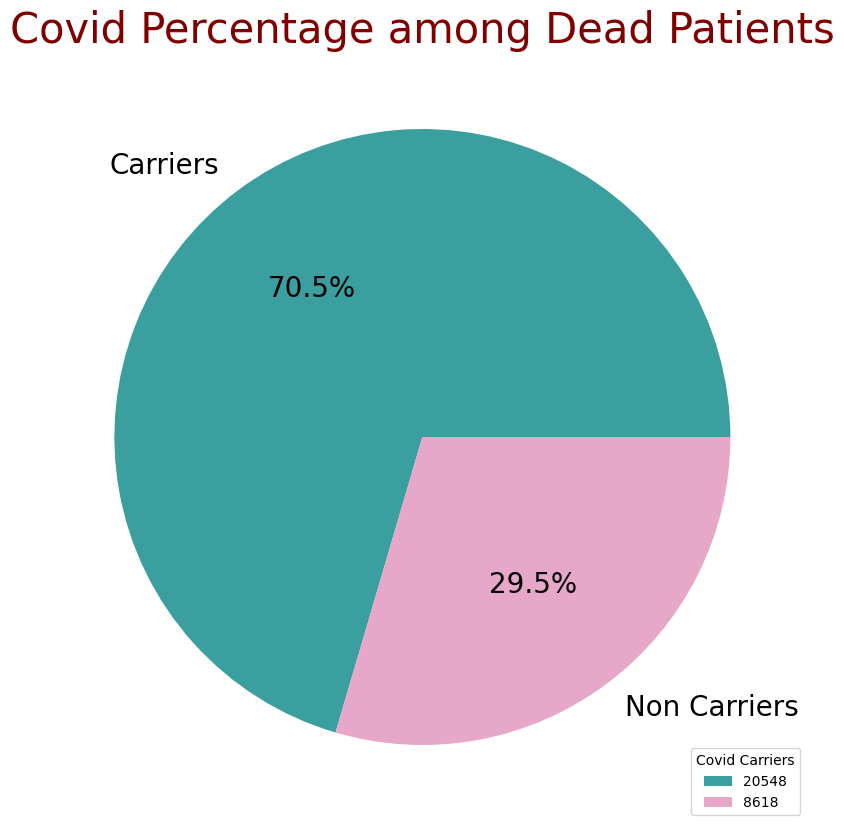

In [20]:
# In pie chart: # Covid carriers among dead patients
labels = ["Carriers", "Non Carriers"]
sizes = df_dead['Covid_or_Not'].value_counts()
colors = ['#3B9E9F', '#E6A7C9']  # Muted teal for Carriers, soft pink for Non Carriers

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 20}, colors=colors)
plt.title('Covid Percentage among Dead Patients', color='Maroon', fontsize=30)
plt.legend(df_dead['Covid_or_Not'].value_counts(), loc='lower right', title='Covid Carriers')
plt.show()

 # Percent of death across carriers:

In [21]:
# Assign 'Covid Carrier' if CLASIFFICATION_FINAL is 1, else 'Non Carrier'
Clean_Covid['Covid_or_Not'] = ['Covid Carrier' if x == 1 else 'Non Carrier' for x in Clean_Covid['covid_infected']]

# Check the result
print(Clean_Covid[['covid_infected', 'Covid_or_Not']].head())
#Extract only covid_data with only covid carrier


   covid_infected   Covid_or_Not
0               1  Covid Carrier
1               0    Non Carrier
2               1  Covid Carrier
3               0    Non Carrier
4               1  Covid Carrier


In [22]:
Covid_death=Clean_Covid[Clean_Covid['Covid_or_Not']=='Covid Carrier']

In [23]:
Covid_death.columns

Index(['Medical_Unit_Level', 'Medical_unit', 'Sex', 'Patient_type',
       'Pneumonia', 'Age', 'Pregnant', 'Diabetes',
       'Chronic_Obstructive_Pulmonary_Disease', 'Asthma', 'Immun_Suppressed',
       'Hipertension', 'Other_disease', 'Cardiovascular', 'Obesity',
       'Renal_chronic', 'Tobacco', 'covid_infected', 'Severity_score',
       'Has_died', 'Covid_or_Not'],
      dtype='object')

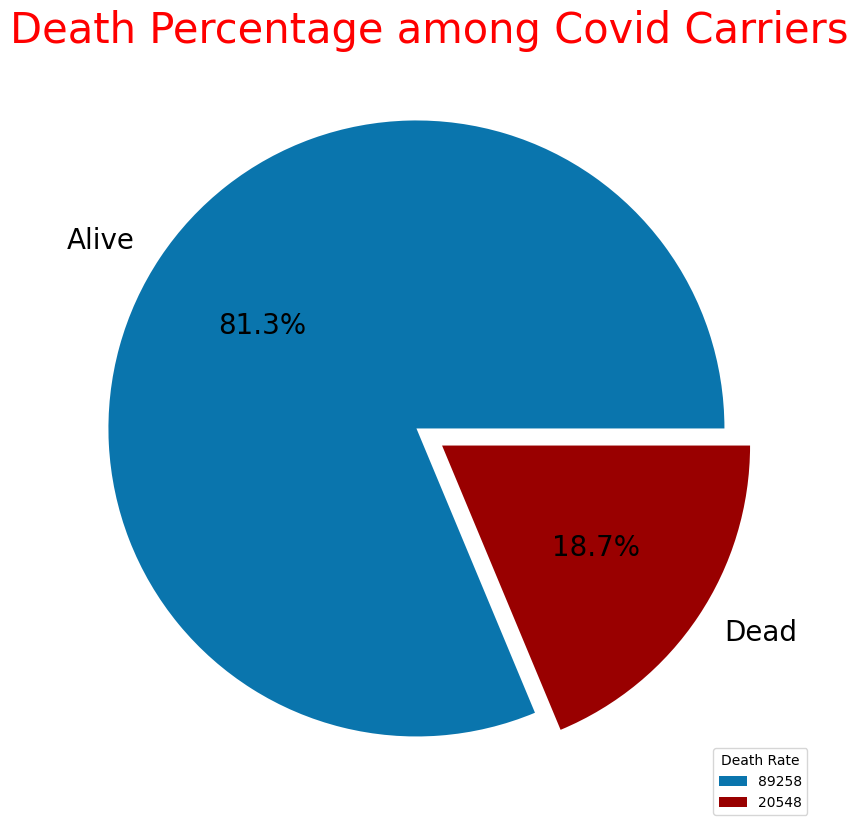

In [24]:
# Now lets visualize the percent of Death across only covid patients:
labels = ["Alive", "Dead"]
sizes = Covid_death['Has_died'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.05, 0.05])
plt.title('Death Percentage among Covid Carriers',color = 'red',fontsize = 30)
plt.legend(Covid_death['Has_died'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

# Age Distribution:
Effect on Death rate
Effect ov covid classification

<Axes: title={'center': 'Age Distribution'}, xlabel='Age', ylabel='Count'>

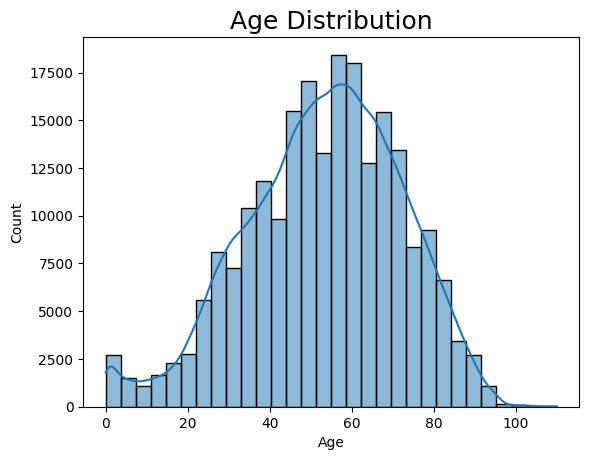

In [25]:
plt.title('Age Distribution', fontsize=18)
sns.histplot(data=new_covid, x=new_covid['Age'],bins=30, kde=True)

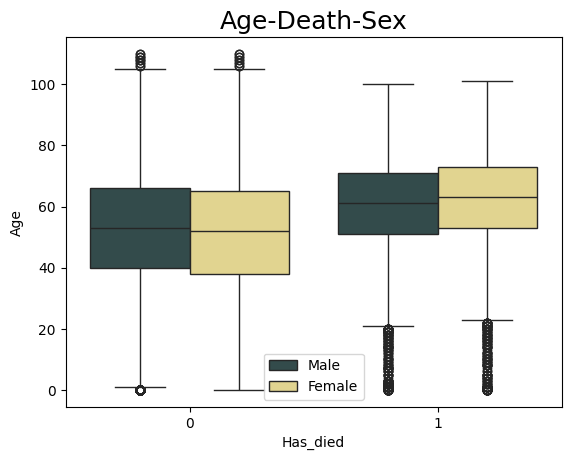

In [26]:
#Age and death relation and effect of sex
sns.boxplot(x="Has_died", y="Age",hue="Sex",data=new_covid,palette=sns.color_palette(["#2f4f4f","#eedd82"]))
plt.title("Age-Death-Sex",fontsize=18)
plt.legend(loc="best")


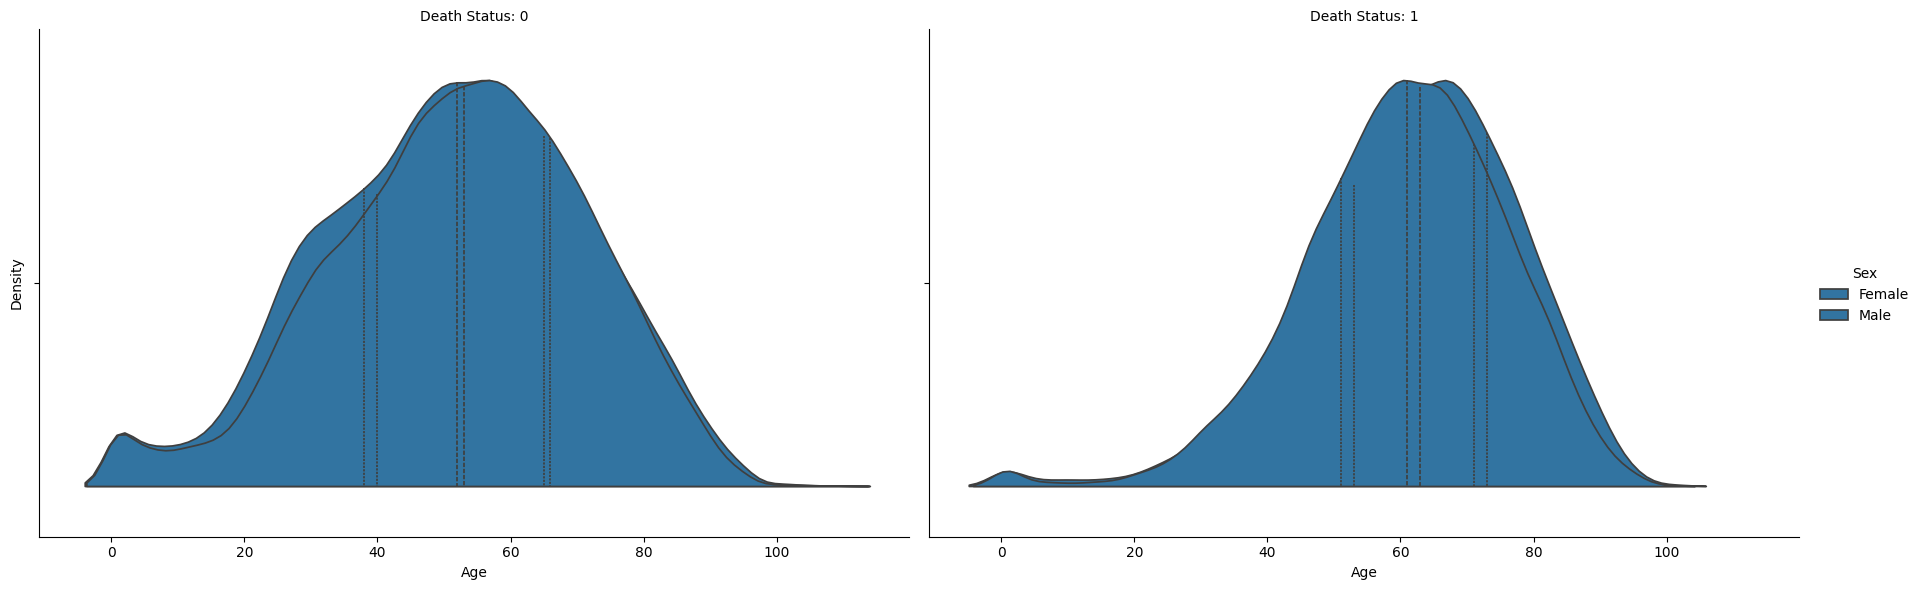

In [27]:
# Use FacetGrid to create separate plots for each death status
g = sns.FacetGrid(new_covid, col="Has_died", hue="Sex", height=6, aspect=1.5)
g.map(sns.violinplot, "Age", inner="quart", palette=sns.color_palette(["#1f77b4", "#ff7f0e"]), split=True)

# Add titles and labels
g.set_axis_labels('Age', 'Density')
g.set_titles("Death Status: {col_name}")
g.add_legend(title='Sex')

# Show the plot
plt.show()

In [28]:
Clean_Covid['Covid_or_Not'].value_counts()

Covid_or_Not
Non Carrier      110987
Covid Carrier    109806
Name: count, dtype: int64

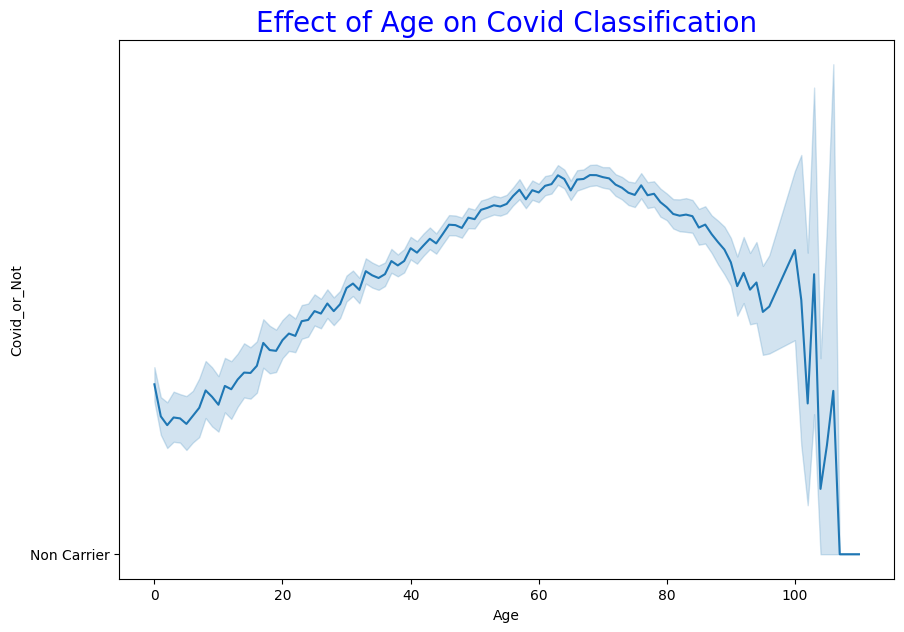

In [29]:
# Boxplot to compare age distribution for Covid carriers vs non-carriers
plt.figure(figsize=(10,7))
sns.lineplot(data=Clean_Covid, x="Age", y="Covid_or_Not")
plt.title('Effect of Age on Covid Classification', color = 'blue', fontsize = 20)
plt.show()

# Gender distribution:
 Effect of gender on death:

In [30]:
Clean_Covid.Sex.value_counts()

Sex
2    122317
1     98476
Name: count, dtype: int64

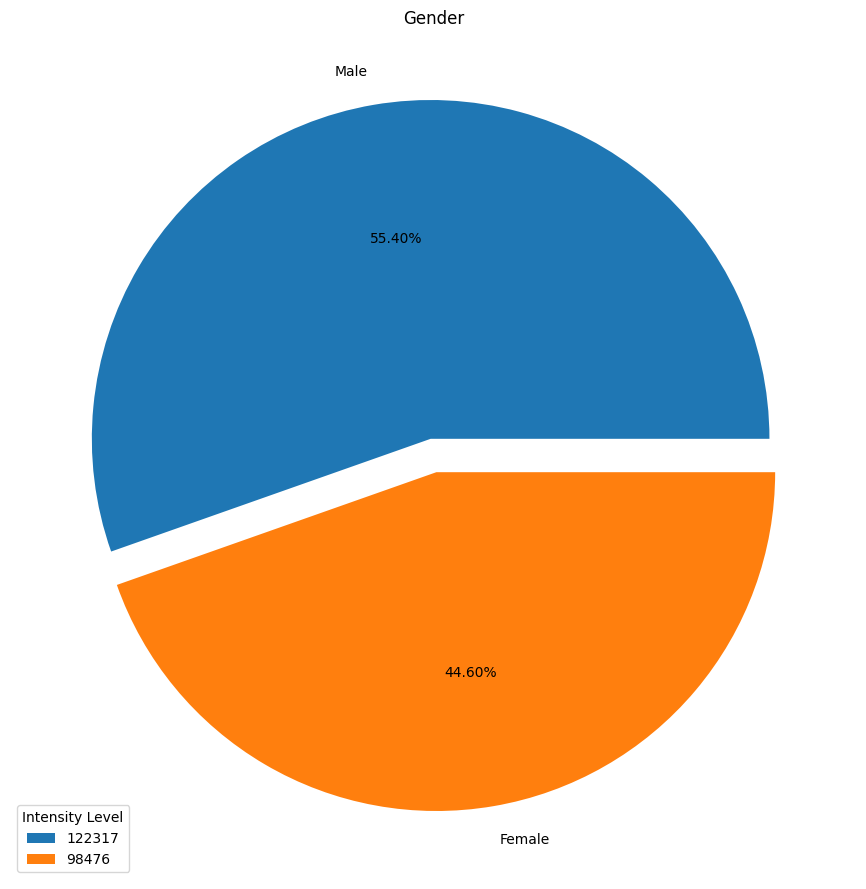

In [31]:
plt.figure(figsize = (15, 11))
plt.title("Gender")
plt.pie(Clean_Covid.Sex.value_counts(), explode = (0.05, 0.05), labels = ['Male', 'Female'],autopct = '%1.2f%%')
plt.legend(Clean_Covid.Sex.value_counts(), loc = 'lower left', title = 'Intensity Level')


In [32]:
new_covid.columns

Index(['Medical_Unit_Level', 'Medical_unit', 'Sex', 'Patient_type',
       'Pneumonia', 'Age', 'Pregnant', 'Diabetes',
       'Chronic_Obstructive_Pulmonary_Disease', 'Asthma', 'Immun_Suppressed',
       'Hipertension', 'Other_disease', 'Cardiovascular', 'Obesity',
       'Renal_chronic', 'Tobacco', 'covid_infected', 'Severity_score',
       'Has_died'],
      dtype='object')

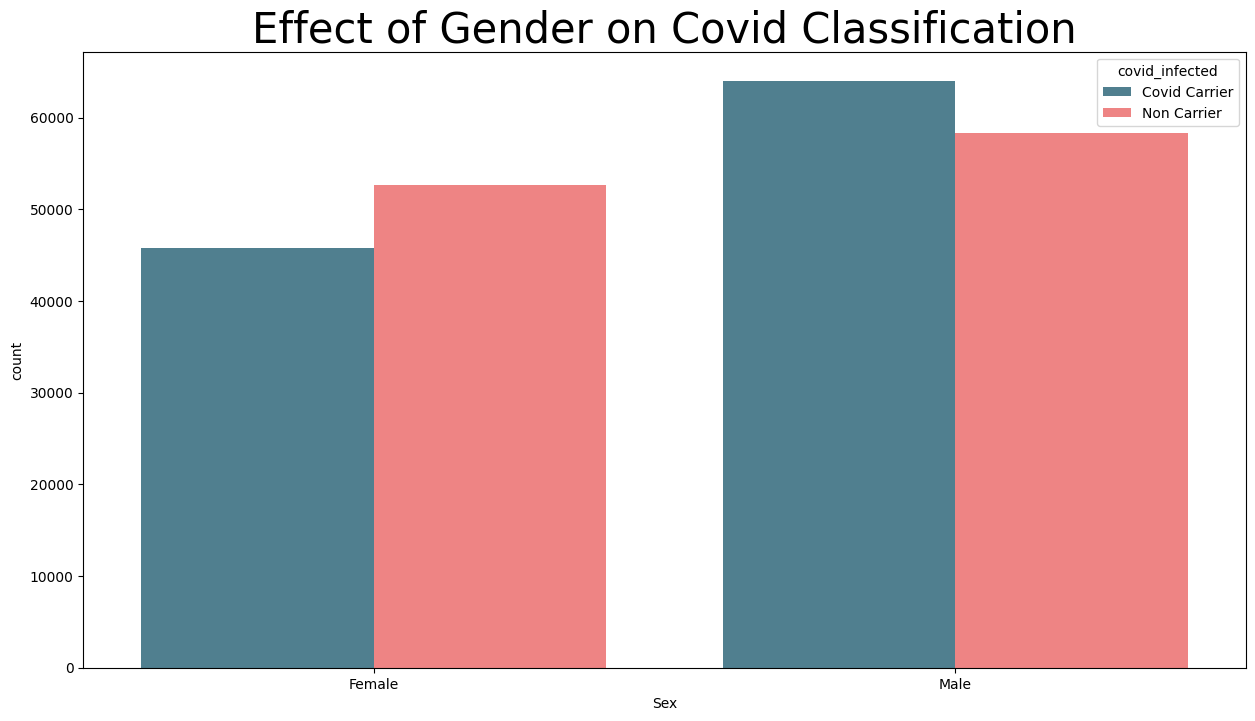

In [33]:

plt.figure(figsize=(15,8))
sns.countplot(data=new_covid, x="Sex", hue="covid_infected", palette = ['#468499', '#ff7373'])
plt.title('Effect of Gender on Covid Classification', color = 'black', fontsize = 30)
plt.show()

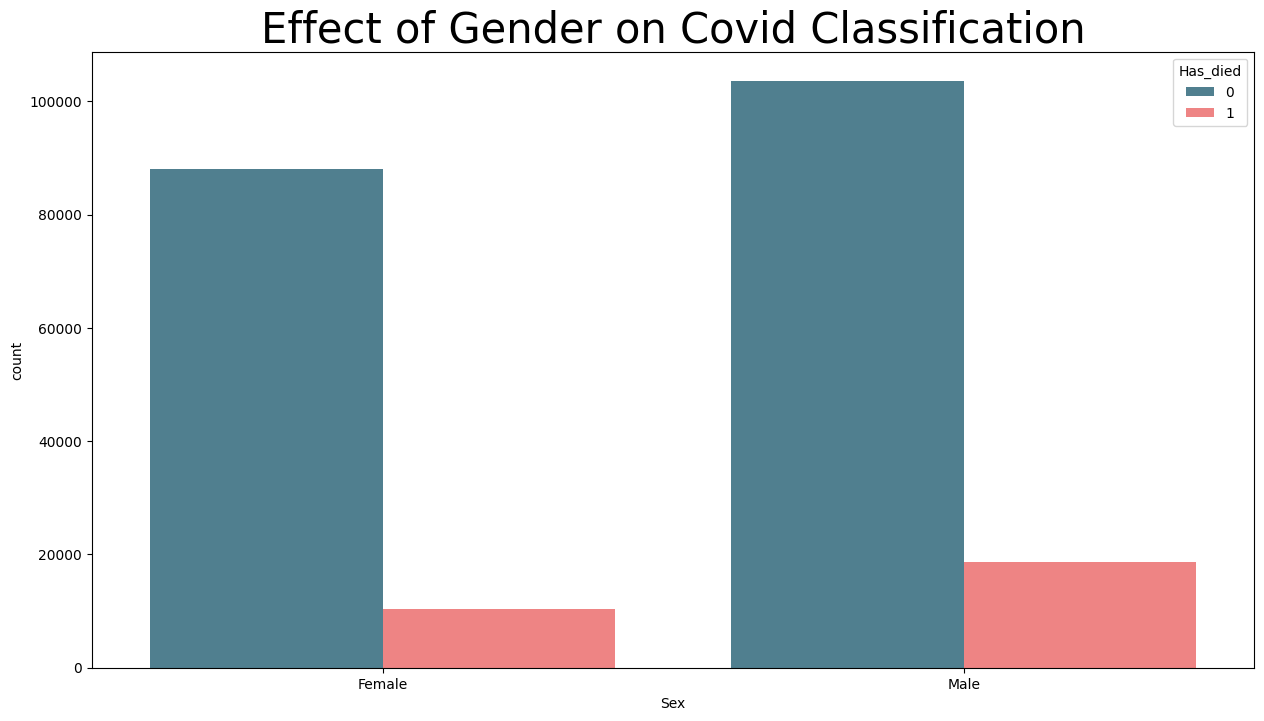

In [34]:
#Effect on Death:
plt.figure(figsize=(15,8))
sns.countplot(data=new_covid, x="Sex", hue="Has_died", palette = ['#468499', '#ff7373'])
plt.title('Effect of Gender on Covid Classification', color = 'black', fontsize = 30)
plt.show()

# Pregnancy effect:

In [35]:
df_preg = Clean_Covid[Clean_Covid["Sex"] == 1]
df_preg["Pregnant"].value_counts()

Pregnant
0.0    95728
1.0     2748
Name: count, dtype: int64

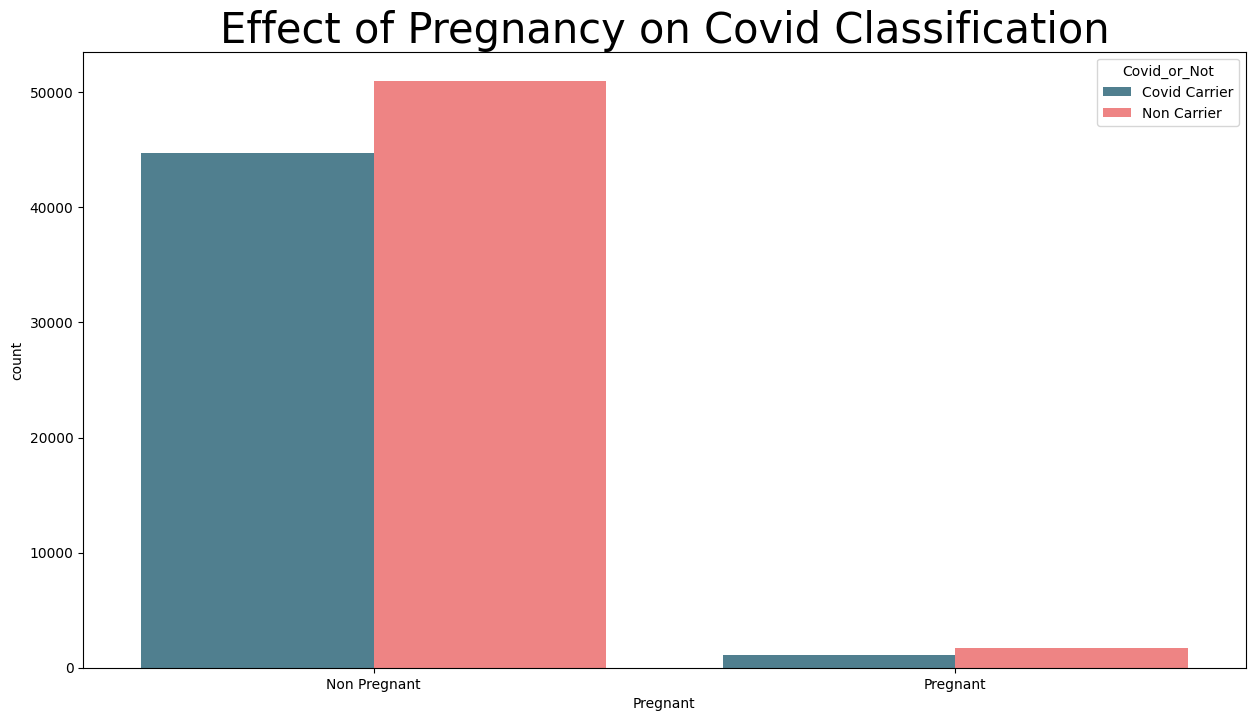

In [36]:
df_preg['Pregnant'] = ["Pregnant" if i==1 else "Non Pregnant" for i in df_preg.Pregnant]
plt.figure(figsize=(15,8))
sns.countplot(data=df_preg, x="Pregnant", hue="Covid_or_Not", palette = ['#468499', '#ff7373'])
plt.title('Effect of Pregnancy on Covid Classification', color = 'black', fontsize = 30)
plt.show()

In [37]:
df_preg[(df_preg['Pregnant'] == 'Pregnant')]['Covid_or_Not'].value_counts()

Covid_or_Not
Non Carrier      1686
Covid Carrier    1062
Name: count, dtype: int64

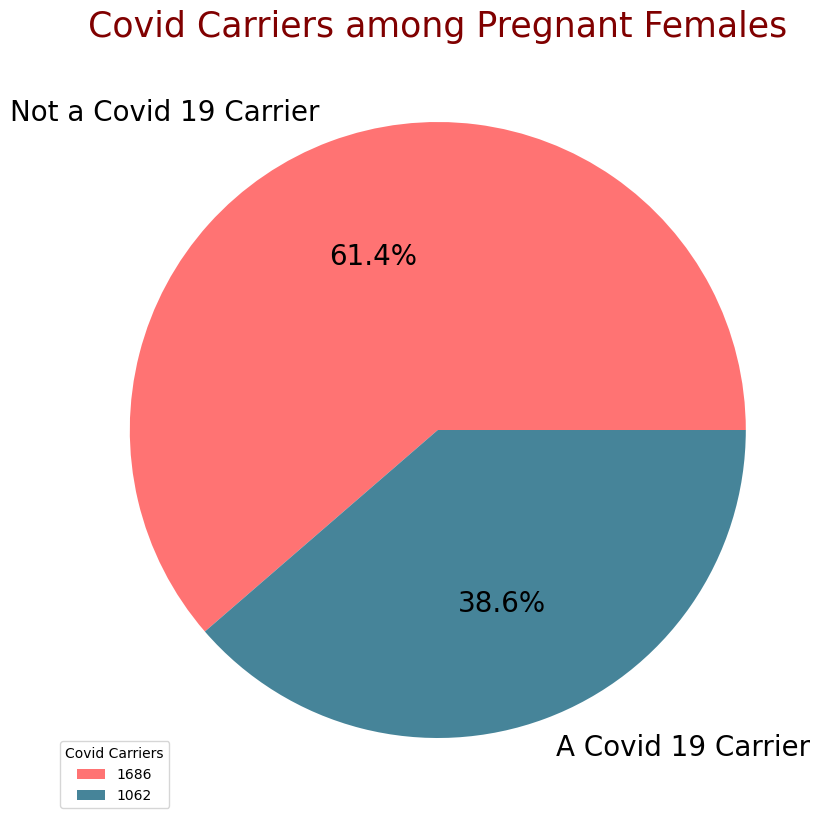

In [38]:
#If we focus more on pregnant to chsck if it has effect on death and on covid-carrier or not:
labels = ["Not a Covid 19 Carrier", "A Covid 19 Carrier"]
sizes = df_preg[(df_preg['Pregnant'] == 'Pregnant')]['Covid_or_Not'].value_counts()
colors = ['#ff7373', '#468499']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.legend(df_preg[(df_preg['Pregnant'] == 'Pregnant')]['Covid_or_Not'].value_counts(), loc = 'lower left',
           title = 'Covid Carriers')
plt.title('Covid Carriers among Pregnant Females', color = 'maroon', fontsize = 25)
plt.show()

# Effect of incidences on death rate:

In [39]:
Clean_Covid.columns

Index(['Medical_Unit_Level', 'Medical_unit', 'Sex', 'Patient_type',
       'Pneumonia', 'Age', 'Pregnant', 'Diabetes',
       'Chronic_Obstructive_Pulmonary_Disease', 'Asthma', 'Immun_Suppressed',
       'Hipertension', 'Other_disease', 'Cardiovascular', 'Obesity',
       'Renal_chronic', 'Tobacco', 'covid_infected', 'Severity_score',
       'Has_died', 'Covid_or_Not'],
      dtype='object')

In [40]:
import plotly.express as px

# Calculate the total death percentage
total_death_percentage = Clean_Covid[Clean_Covid['Has_died'] == 1].shape[0] / Clean_Covid.shape[0] * 100
print("Total death percentage in the sample = {:.2f}%".format(total_death_percentage))

# List of columns that represent risk factors
risk_factors = [ "Asthma", "Hipertension", 
                "Obesity", "Cardiovascular", "Renal_chronic", "Tobacco", 
                "Other_disease", "Chronic_Obstructive_Pulmonary_Disease", "Diabetes", "Pneumonia"]

# List to store death percentages for each factor
death_percentages = []

# Calculate death percentage for each risk factor without using a function
for column in risk_factors:
    # Total number of patients who have this risk factor
    total_with_factor = Clean_Covid[Clean_Covid[column] == 1].shape[0]
    
    # Number of patients who have the risk factor and died
    deaths_with_factor = Clean_Covid[(Clean_Covid[column] == 1) & (Clean_Covid['Has_died'] == 1)].shape[0]
    
    # Calculate death percentage
    if total_with_factor > 0:
        death_percentage = deaths_with_factor / total_with_factor * 100
    else:
        death_percentage = 0  # to avoid division by zero
    
    print(f"Death percentage for patients with {column}: {death_percentage:.2f}%")
    death_percentages.append(death_percentage)

# Print the maximum death percentage among the factors
print("Maximum death percentage among risk factors: {:.2f}%".format(max(death_percentages)))

# Plotting the result using a bar chart
fig = px.bar(
    x=risk_factors, 
    y=death_percentages, 
    text_auto=".2s",
    title="Death Percentage for Each Risk Factor (Reflecting the effect of each on death):",
    labels={'x': 'Risk Factors', 'y': 'Death Percentage'}
)

fig.show()

Total death percentage in the sample = 13.21%
Death percentage for patients with Asthma: 3.93%
Death percentage for patients with Hipertension: 14.60%
Death percentage for patients with Obesity: 10.98%
Death percentage for patients with Cardiovascular: 10.00%
Death percentage for patients with Renal_chronic: 13.68%
Death percentage for patients with Tobacco: 8.11%
Death percentage for patients with Other_disease: 9.40%
Death percentage for patients with Chronic_Obstructive_Pulmonary_Disease: 11.50%
Death percentage for patients with Diabetes: 15.35%
Death percentage for patients with Pneumonia: 20.96%
Maximum death percentage among risk factors: 20.96%


# Effect of incidences on Covid-Carrier patients:

In [41]:
Clean_Covid.Covid_or_Not.value_counts()

Covid_or_Not
Non Carrier      110987
Covid Carrier    109806
Name: count, dtype: int64

In [42]:
# Calculate the total Covid Carrier percentage
total_covid_carrier = Clean_Covid[Clean_Covid['Covid_or_Not'] == 'Covid Carrier'].shape[0] / Clean_Covid.shape[0] * 100
print("Total Covid Carrier percentage in the sample = {:.2f}%".format(total_covid_carrier))

# List of columns that represent risk factors
risk_factors = ["Asthma", "Hipertension", "Obesity", "Cardiovascular", 
                "Renal_chronic", "Tobacco", "Other_disease", 
                "Chronic_Obstructive_Pulmonary_Disease", "Diabetes", "Pneumonia"]

# List to store Covid Carrier percentages for each factor
covid_carrier_percentages = []

# Calculate Covid Carrier percentage for each risk factor
for column in risk_factors:
    # Total number of patients who have this risk factor
    total_factor = Clean_Covid[Clean_Covid[column] == 1].shape[0]
    
    # Number of patients who have the risk factor and are Covid Carriers
    covid_with_factor = Clean_Covid[(Clean_Covid[column] == 1) & (Clean_Covid['Covid_or_Not'] == 'Covid Carrier')].shape[0]
    
    # Calculate percentage
    if total_factor > 0:
        covid_percentage = covid_with_factor / total_factor * 100
    else:
        covid_percentage = 0  # Avoid division by zero
    
    print(f"Covid Carrier percentage for patients with {column}: {covid_percentage:.2f}%")
    covid_carrier_percentages.append(covid_percentage)

# Print the maximum Covid Carrier percentage among the factors
print("Maximum Covid Carrier percentage among risk factors: {:.2f}%".format(max(covid_carrier_percentages)))

# Plotting the result using a bar chart
import plotly.express as px

fig = px.bar(
    x=risk_factors, 
    y=covid_carrier_percentages, 
    text_auto=".2f",
    title="Covid Carrier Percentage for Each Risk Factor:",
    labels={'x': 'Risk Factors', 'y': 'Covid Carrier Percentage'}
)

fig.show()

Total Covid Carrier percentage in the sample = 49.73%
Covid Carrier percentage for patients with Asthma: 39.64%
Covid Carrier percentage for patients with Hipertension: 52.17%
Covid Carrier percentage for patients with Obesity: 52.36%
Covid Carrier percentage for patients with Cardiovascular: 43.47%
Covid Carrier percentage for patients with Renal_chronic: 44.12%
Covid Carrier percentage for patients with Tobacco: 43.37%
Covid Carrier percentage for patients with Other_disease: 39.26%
Covid Carrier percentage for patients with Chronic_Obstructive_Pulmonary_Disease: 43.07%
Covid Carrier percentage for patients with Diabetes: 53.49%
Covid Carrier percentage for patients with Pneumonia: 61.77%
Maximum Covid Carrier percentage among risk factors: 61.77%


# Hospitalization effect:

In [44]:
Clean_Covid['Patient_type'].value_counts()

Patient_type
0    129803
1     90990
Name: count, dtype: int64

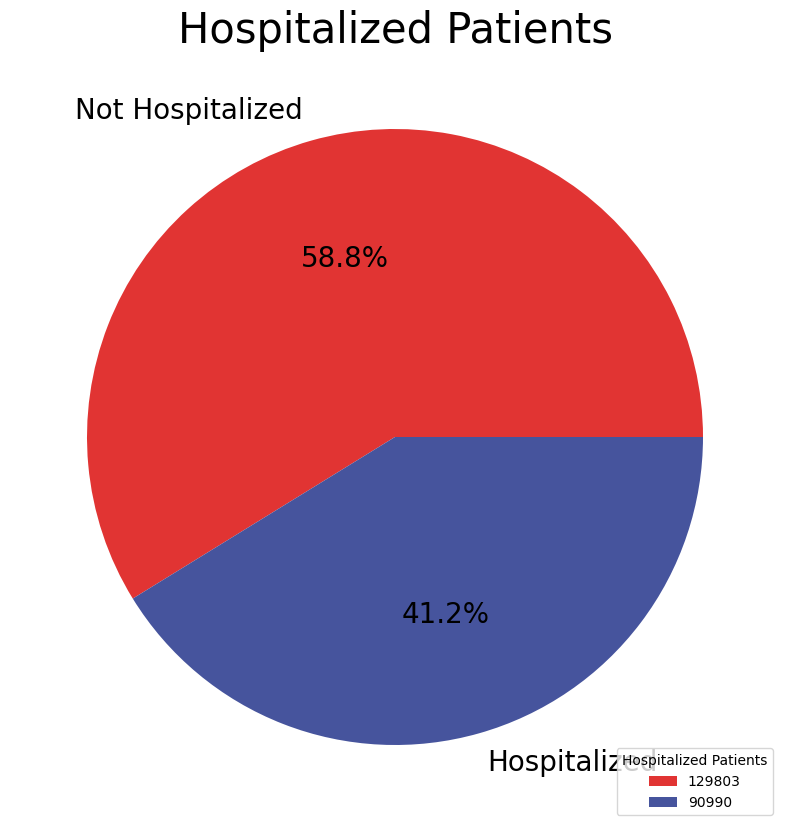

In [45]:
#Check patient type percent 
labels = ["Not Hospitalized", "Hospitalized"]
sizes = Clean_Covid['Patient_type'].value_counts()
colors = ['#e13433', '#46549d']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20},
        colors = colors,)
plt.title('Hospitalized Patients',color = 'black',fontsize = 30)
plt.legend(Clean_Covid['Patient_type'].value_counts(), loc = 'lower right', title = 'Hospitalized Patients')
plt.show()


In [47]:
new_covid['Patient_type'].value_counts()

Patient_type
Hospitalized     129803
Returned Home     90990
Name: count, dtype: int64

In [49]:
# Among the hospitalized, we need to check the death:
df_hosp = new_covid[new_covid['Patient_type']=='Hospitalized']

In [50]:
df_hosp['Has_died'].value_counts()

Has_died
0    103268
1     26535
Name: count, dtype: int64

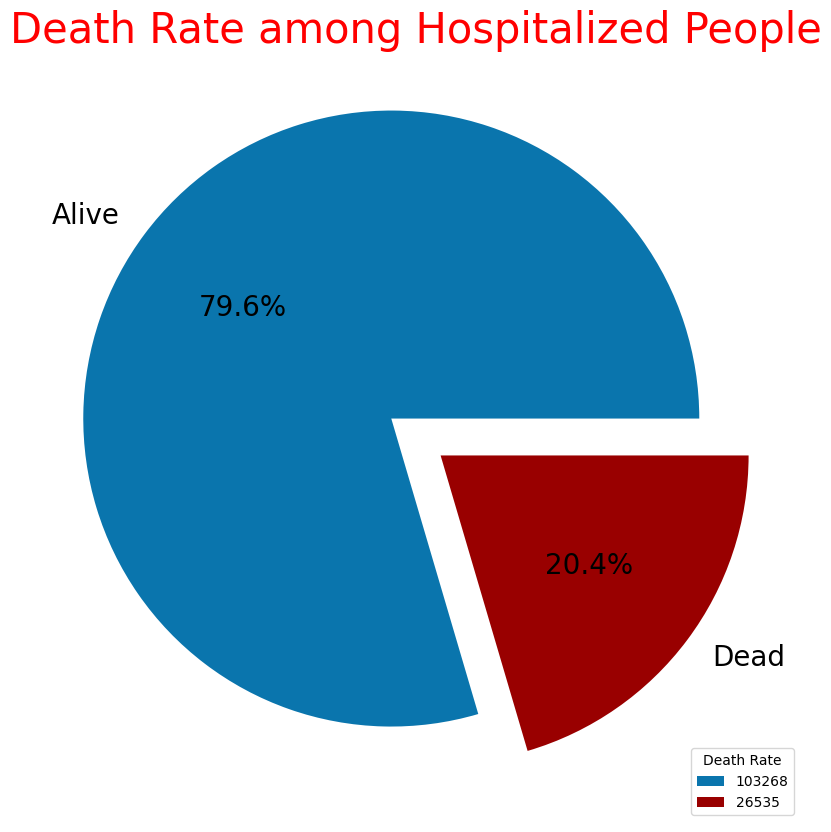

In [51]:
labels = ["Alive", "Dead"]
sizes = df_hosp['Has_died'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.1, 0.1])
plt.title('Death Rate among Hospitalized People', color = 'red', fontsize = 30)
plt.legend(df_hosp['Has_died'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()


In [52]:
df_hosp.columns

Index(['Medical_Unit_Level', 'Medical_unit', 'Sex', 'Patient_type',
       'Pneumonia', 'Age', 'Pregnant', 'Diabetes',
       'Chronic_Obstructive_Pulmonary_Disease', 'Asthma', 'Immun_Suppressed',
       'Hipertension', 'Other_disease', 'Cardiovascular', 'Obesity',
       'Renal_chronic', 'Tobacco', 'covid_infected', 'Severity_score',
       'Has_died'],
      dtype='object')

In [53]:
df_hosp['covid_infected'].value_counts()

covid_infected
Covid Carrier    74812
Non Carrier      54991
Name: count, dtype: int64

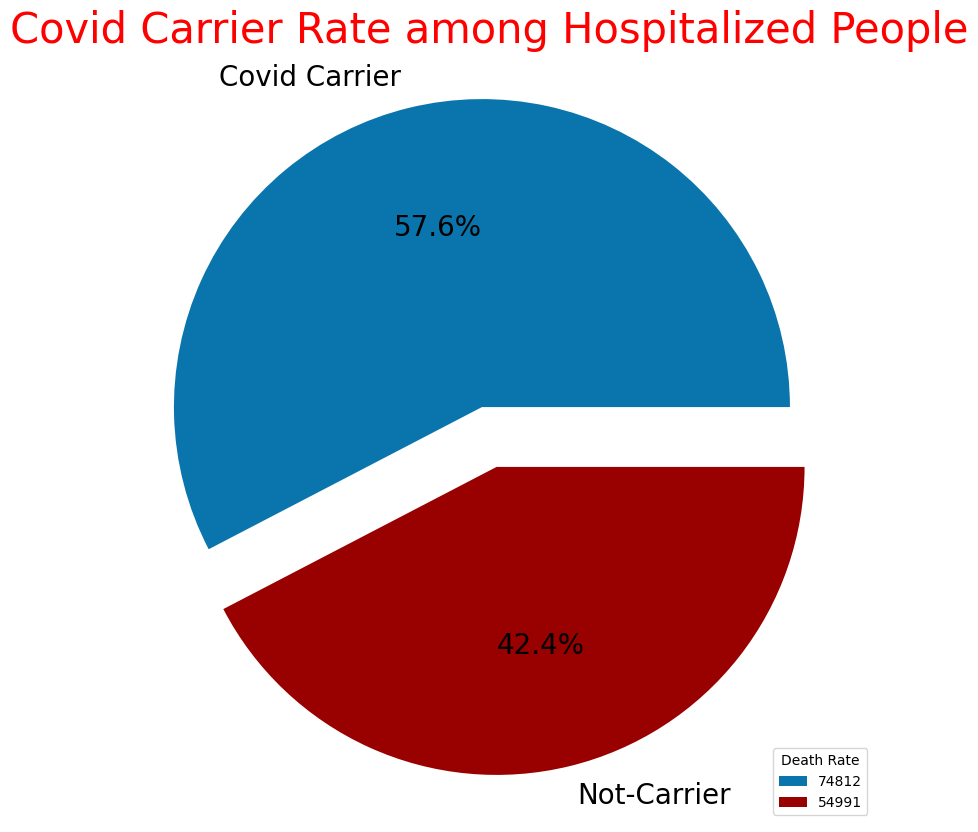

In [55]:
# How much of hospitalized and relation to Covid-19:
labels = ["Covid Carrier", "Not-Carrier"]
sizes = df_hosp['covid_infected'].value_counts()
colors = ['#0a75ad', '#990000']
plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"}, colors = colors,
        explode=[0.1, 0.1])
plt.title('Covid Carrier Rate among Hospitalized People', color = 'red', fontsize = 30)
plt.legend(df_hosp['covid_infected'].value_counts(), loc = 'lower right', title = 'Death Rate')
plt.show()

In [ ]:
Hospitalized     129803
Returned Home

In [59]:
import plotly.express as px

import plotly.express as px

# Filter: Only Covid Carriers
df_covid = Clean_Covid[Clean_Covid['Covid_or_Not'] == 'Covid Carrier']

# List of columns that represent risk factors
risk_factors = ["Asthma", "Hipertension", "Obesity", "Cardiovascular", 
                "Renal_chronic", "Tobacco", "Other_disease", 
                "Chronic_Obstructive_Pulmonary_Disease", "Diabetes", "Pneumonia"]

# List to store hospitalization percentages for each factor
hospitalization_percentages = []

# Calculate hospitalization percentage for each risk factor
for column in risk_factors:
    # Total number of Covid Carriers who have this risk factor
    total_with_factor = df_covid[df_covid[column] == 1].shape[0]
    
    # Number of those patients who were hospitalized
    hospitalized_with_factor = df_covid[(df_covid[column] == 1) & (df_covid['Patient_type'] == 1)].shape[0]
    
    # Calculate hospitalization percentage
    if total_with_factor > 0:
        hospitalization_percentage = hospitalized_with_factor / total_with_factor * 100
    else:
        hospitalization_percentage = 0  # to avoid division by zero
    
    print(f"Hospitalization percentage among Covid Carriers with {column}: {hospitalization_percentage:.2f}%")
    hospitalization_percentages.append(hospitalization_percentage)

# Print the maximum hospitalization percentage among the factors
print("Maximum hospitalization percentage among risk factors (Covid Carriers): {:.2f}%".format(max(hospitalization_percentages)))

# Plotting the result using a bar chart
fig = px.bar(
    x=risk_factors, 
    y=hospitalization_percentages, 
    text_auto=".2f",
    title="Hospitalization Percentage for Each Risk Factor (Covid Carriers Only):",
    labels={'x': 'Risk Factors', 'y': 'Hospitalization Percentage'}
)

fig.show()


Hospitalization percentage among Covid Carriers with Asthma: 60.13%
Hospitalization percentage among Covid Carriers with Hipertension: 28.46%
Hospitalization percentage among Covid Carriers with Obesity: 36.30%
Hospitalization percentage among Covid Carriers with Cardiovascular: 39.47%
Hospitalization percentage among Covid Carriers with Renal_chronic: 29.64%
Hospitalization percentage among Covid Carriers with Tobacco: 43.31%
Hospitalization percentage among Covid Carriers with Other_disease: 38.99%
Hospitalization percentage among Covid Carriers with Chronic_Obstructive_Pulmonary_Disease: 34.43%
Hospitalization percentage among Covid Carriers with Diabetes: 26.82%
Hospitalization percentage among Covid Carriers with Pneumonia: 12.32%
Maximum hospitalization percentage among risk factors (Covid Carriers): 60.13%


# Time of distribution of Covid:

In [ ]:
# Death of peaople:

In [68]:
#As the dearth date from the initial data and Covid, hospitaliztion form Clean_Covid:
Covid_df=pd.read_csv("C:/Users/Dell/Desktop/Aya Allam DEPI Project/Covid Data.csv")
# Extract Month and Year from DATE_DIED

#Parsing of date
Covid_df['date_parsed']=pd.to_datetime(Covid_df['DATE_DIED'][Covid_df['DATE_DIED']!="9999-99-99"], format="%d/%m/%Y")



In [69]:
Covid_df['date_parsed']

0         2020-05-03
1         2020-06-03
2         2020-06-09
3         2020-06-12
4         2020-06-21
             ...    
1048570          NaT
1048571          NaT
1048572          NaT
1048573          NaT
1048574          NaT
Name: date_parsed, Length: 1048575, dtype: datetime64[ns]

In [71]:
Covid_df["YEAR"] = Covid_df["date_parsed"].dt.year
Covid_df["MONTH"] = Covid_df["date_parsed"].dt.month

In [73]:
valid_dates_df = Covid_df[Covid_df['date_parsed'].notna()].copy()

# Step 3: Extract YEAR and MONTH
valid_dates_df['YEAR'] = valid_dates_df['date_parsed'].dt.year
valid_dates_df['MONTH'] = valid_dates_df['date_parsed'].dt.month

In [75]:
valid_dates_df.shape

(76942, 24)

In [83]:
# Step 1: Reset index
valid_dates_df = valid_dates_df.reset_index(drop=True)
Clean_Covid = Clean_Covid.reset_index(drop=True)

# Step 2: Merge by adding columns
merged_df = pd.concat([
    valid_dates_df[['DATE_DIED', 'date_parsed', 'YEAR', 'MONTH']],  # keep parsed date info
    Clean_Covid[['Covid_or_Not', 'Patient_type','Has_died']]                  # keep Covid info
], axis=1)

# Step 3: View the merged dataframe
print(merged_df.head())

    DATE_DIED date_parsed    YEAR  MONTH   Covid_or_Not  Patient_type  \
0    3/5/2020  2020-05-03  2020.0    5.0  Covid Carrier             1   
1    3/6/2020  2020-06-03  2020.0    6.0    Non Carrier             1   
2    9/6/2020  2020-06-09  2020.0    6.0  Covid Carrier             0   
3   12/6/2020  2020-06-12  2020.0    6.0    Non Carrier             1   
4  21/06/2020  2020-06-21  2020.0    6.0  Covid Carrier             1   

   Has_died  
0         1  
1         1  
2         1  
3         1  
4         0  


In [ ]:
merged_df.head().isnull().sum()

DATE_DIED       0
date_parsed     0
YEAR            0
MONTH           0
Covid_or_Not    0
Patient_type    0
Has_died        0
dtype: int64

In [ ]:
# I need to drow realtion show months and years with patients dead patients:

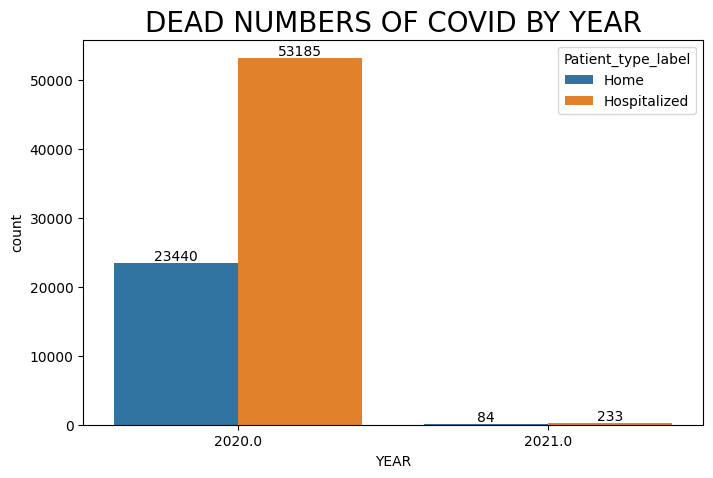

In [86]:
# In years:
# First, map Patient_type numbers to readable labels
merged_df['Patient_type_label'] = merged_df['Patient_type'].map({0: 'Hospitalized', 1: 'Home'})
plt.figure(figsize = (8,5))
ax = sns.countplot(x = "YEAR", hue = "Patient_type_label", data = merged_df)
plt.title("DEAD NUMBERS OF COVID BY YEAR", fontsize = 20)
for bars in ax.containers:
    ax.bar_label(bars)


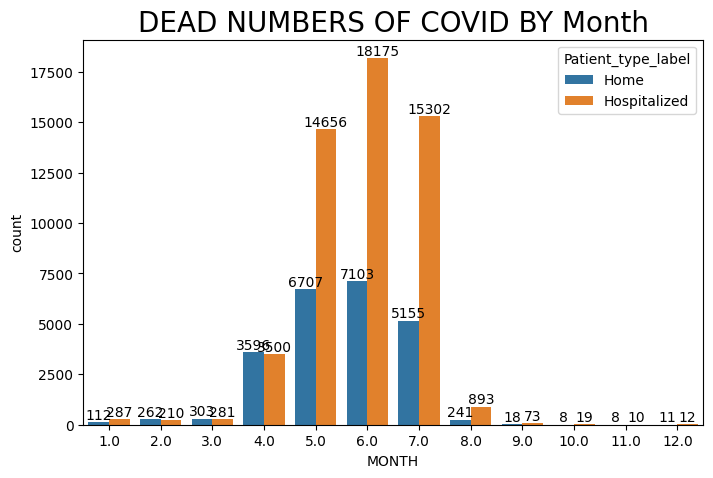

In [91]:
# In months:
plt.figure(figsize = (8,5))
ax = sns.countplot(x = "MONTH", hue = "Patient_type_label", data = merged_df)
plt.title("DEAD NUMBERS OF COVID BY Month", fontsize = 20)
for bars in ax.containers:
    ax.bar_label(bars)


# To be more specified check death across covid_patients only:

In [93]:
merged_df_covid=merged_df[merged_df['Covid_or_Not']=='Covid Carrier']

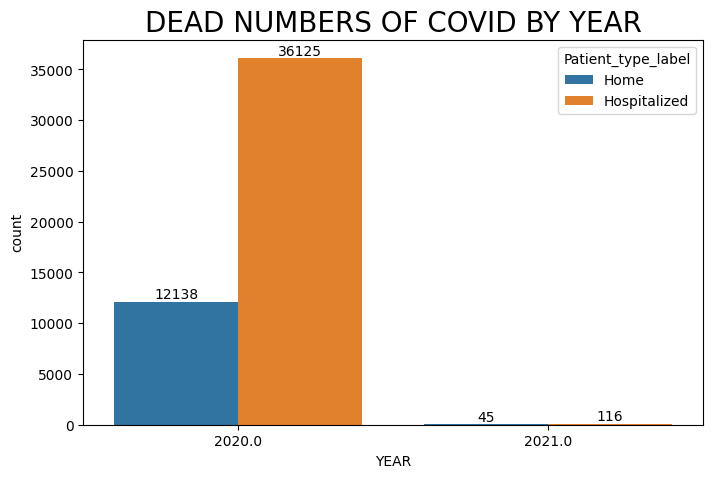

In [94]:
#In years:
plt.figure(figsize = (8,5))
ax = sns.countplot(x = "YEAR", hue = "Patient_type_label", data =merged_df_covid)
plt.title("DEAD NUMBERS OF COVID BY YEAR", fontsize = 20)
for bars in ax.containers:
    ax.bar_label(bars)


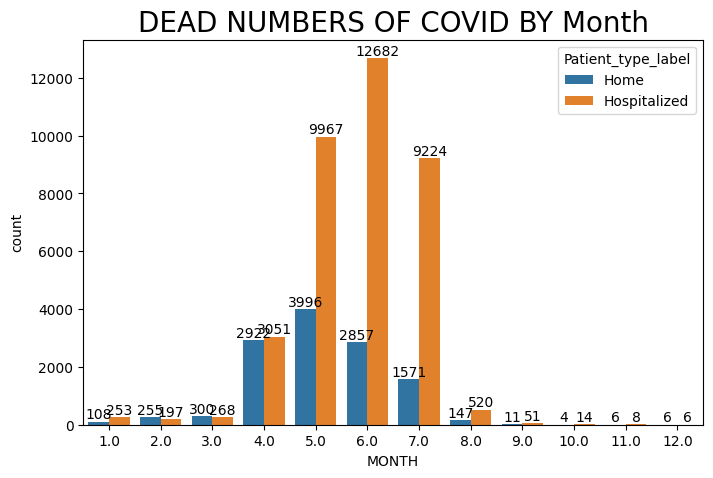

In [95]:

# In months:
plt.figure(figsize = (8,5))
ax = sns.countplot(x = "MONTH", hue = "Patient_type_label", data = merged_df_covid)
plt.title("DEAD NUMBERS OF COVID BY Month", fontsize = 20)
for bars in ax.containers:
    ax.bar_label(bars)